In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_train = pd.read_csv("ashrae-energy-prediction/train.csv")
data_meta = pd.read_csv("ashrae-energy-prediction/building_metadata.csv")

In [3]:
train_weather = pd.read_csv("ashrae-energy-prediction/weather_train.csv")

In [4]:
mer_data = pd.merge(data_train, data_meta, on = 'building_id')

In [6]:
mer_data.head()

building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            0      0  2016-01-01 01:00:00            0.0        0   
2            0      0  2016-01-01 02:00:00            0.0        0   
3            0      0  2016-01-01 03:00:00            0.0        0   
4            0      0  2016-01-01 04:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  
0   Education         7432      2008.0          NaN  
1   Education         7432      2008.0          NaN  
2   Education         7432      2008.0          NaN  
3   Education         7432      2008.0          NaN  
4   Education         7432      2008.0          NaN

In [14]:
merged_data = pd.merge(mer_data, train_weather, how = "left", on=['timestamp', 'site_id'])

In [11]:
merged_data.head()

building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            0      0  2016-01-01 01:00:00            0.0        0   
2            0      0  2016-01-01 02:00:00            0.0        0   
3            0      0  2016-01-01 03:00:00            0.0        0   
4            0      0  2016-01-01 04:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   
1   Education         7432      2008.0          NaN             24.4   
2   Education         7432      2008.0          NaN             22.8   
3   Education         7432      2008.0          NaN             21.1   
4   Education         7432      2008.0          NaN             20.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              1019.7   
1             NaN             21.1               -1.0              1020.2   
2             2.0             21.1                0.0              1020.2   
3             2.0             20.6                0.0              1020.1   
4             2.0             20.0               -1.0              1020.0   

   wind_direction  wind_speed  
0             0.0         0.0  
1            70.0         1.5  
2             0.0         0.0  
3             0.0         0.0  
4           250.0         2.6

In [15]:
merged_data.timestamp = pd.to_datetime(merged_data['timestamp'])

In [16]:
merged_data = merged_data.set_index("timestamp")

In [21]:
merged_data.head()

building_id  meter  meter_reading  site_id primary_use  \
timestamp                                                                     
2016-01-01 00:00:00            0      0            0.0        0   Education   
2016-01-01 01:00:00            0      0            0.0        0   Education   
2016-01-01 02:00:00            0      0            0.0        0   Education   
2016-01-01 03:00:00            0      0            0.0        0   Education   
2016-01-01 04:00:00            0      0            0.0        0   Education   

                     square_feet  year_built  floor_count  air_temperature  \
timestamp                                                                    
2016-01-01 00:00:00         7432      2008.0          NaN             25.0   
2016-01-01 01:00:00         7432      2008.0          NaN             24.4   
2016-01-01 02:00:00         7432      2008.0          NaN             22.8   
2016-01-01 03:00:00         7432      2008.0          NaN             21.1   
2016-01-01 04:00:00         7432      2008.0          NaN             20.0   

                     cloud_coverage  dew_temperature  precip_depth_1_hr  \
timestamp                                                                 
2016-01-01 00:00:00             6.0             20.0                NaN   
2016-01-01 01:00:00             NaN             21.1               -1.0   
2016-01-01 02:00:00             2.0             21.1                0.0   
2016-01-01 03:00:00             2.0             20.6                0.0   
2016-01-01 04:00:00             2.0             20.0               -1.0   

                     sea_level_pressure  wind_direction  wind_speed  
timestamp                                                            
2016-01-01 00:00:00              1019.7             0.0         0.0  
2016-01-01 01:00:00              1020.2            70.0         1.5  
2016-01-01 02:00:00              1020.2             0.0         0.0  
2016-01-01 03:00:00              1020.1             0.0         0.0  
2016-01-01 04:00:00              1020.0           250.0         2.6

In [17]:
merged_data = merged_data[['building_id','meter_reading','site_id','primary_use','air_temperature','dew_temperature','wind_speed']]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


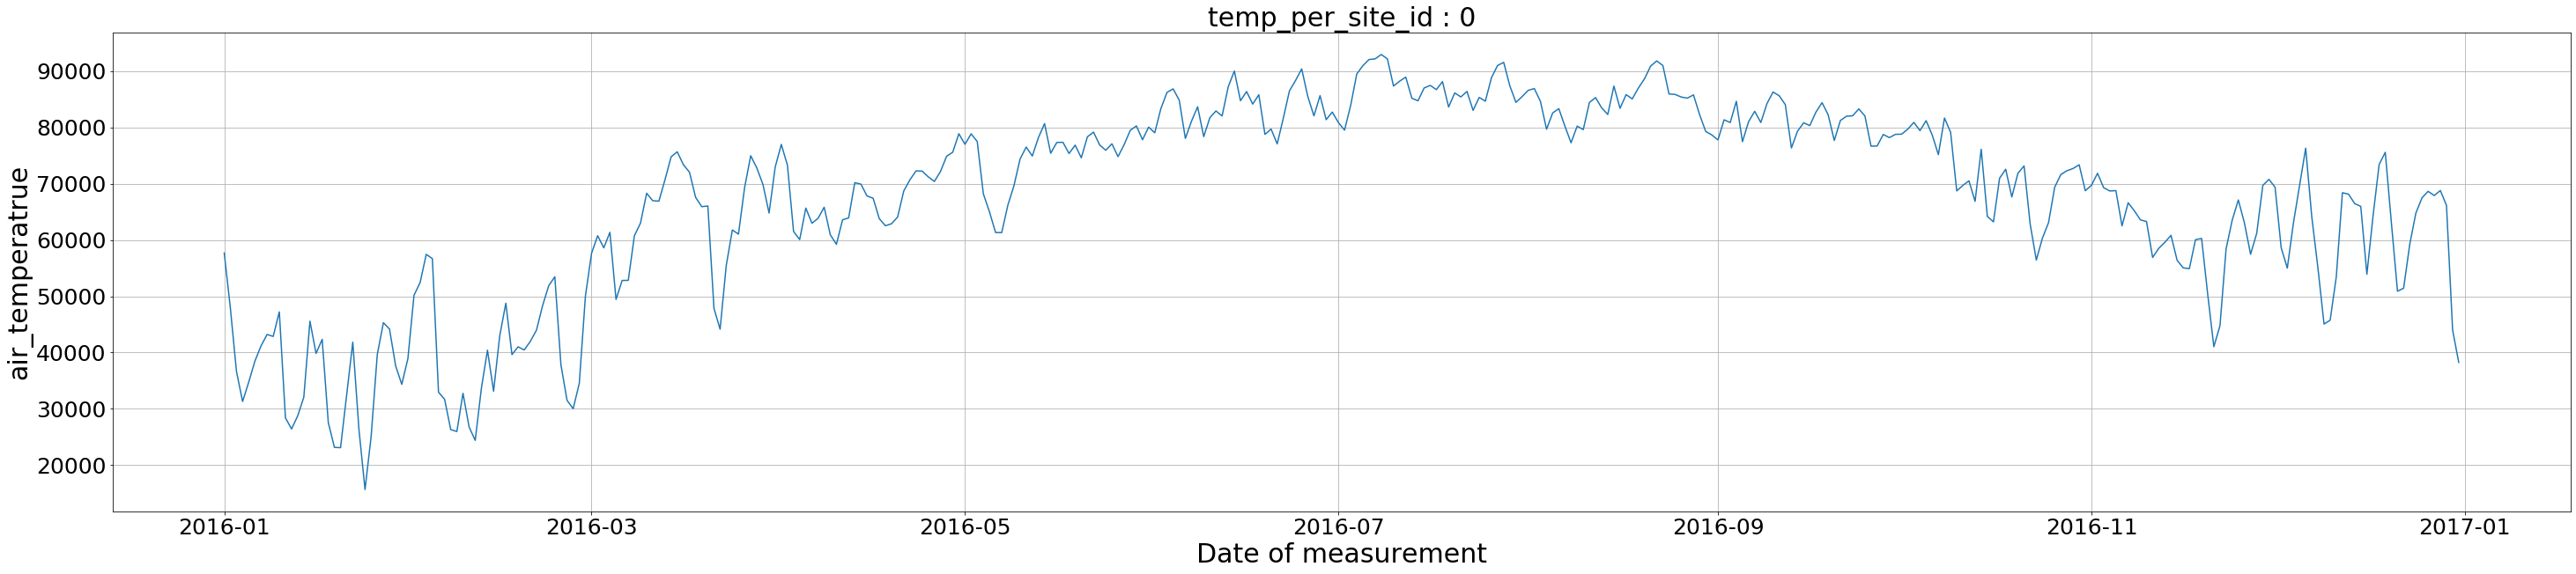

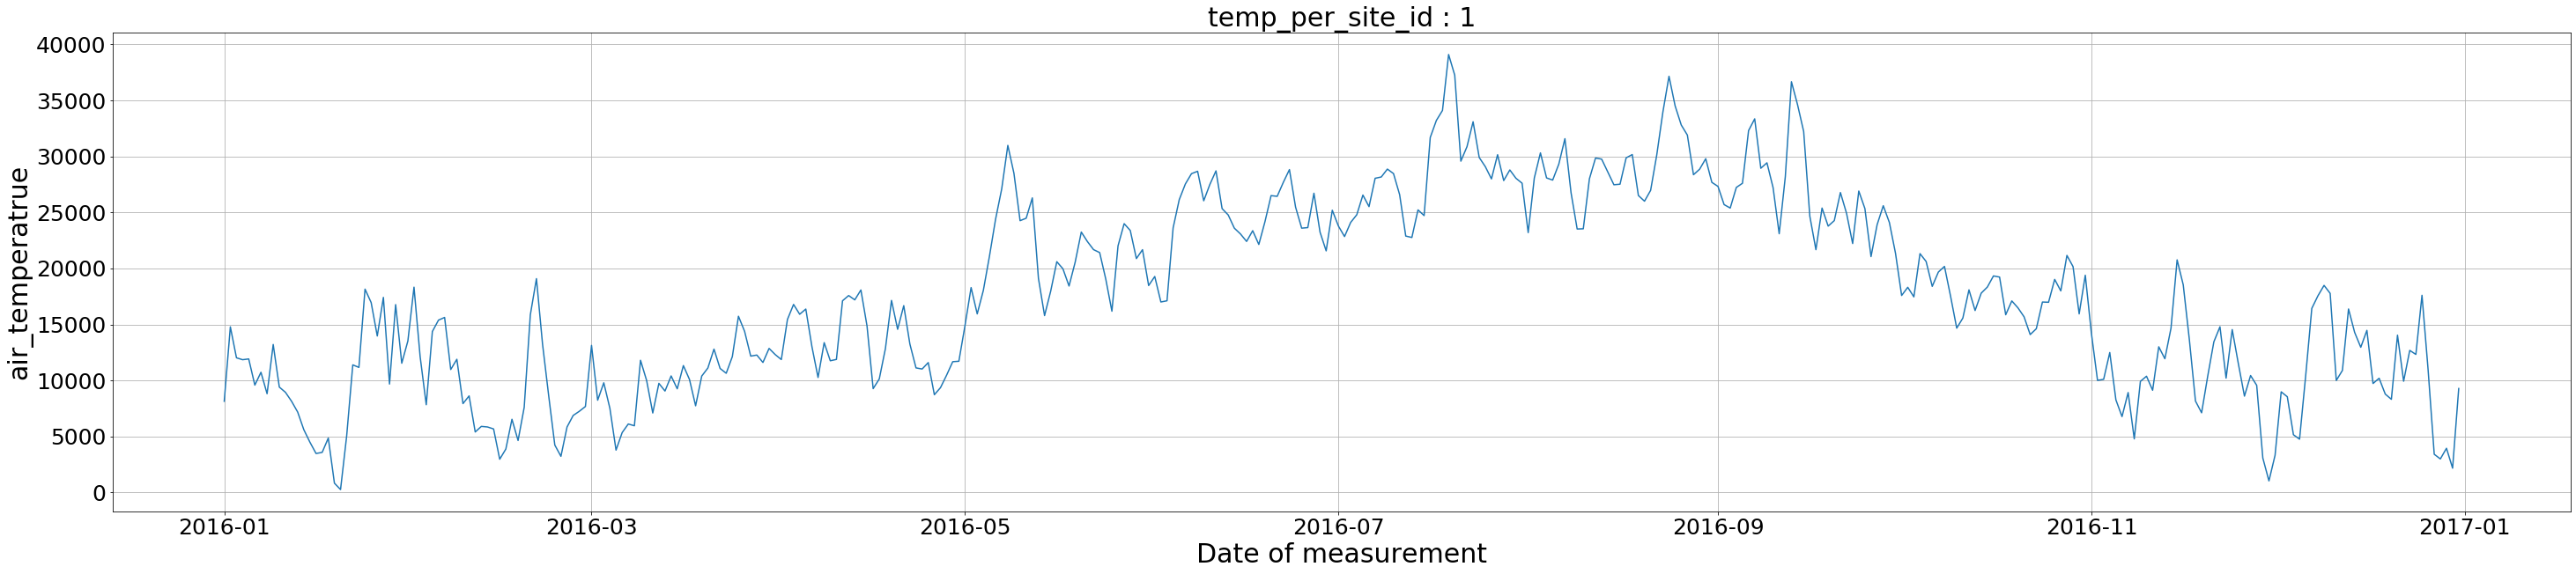

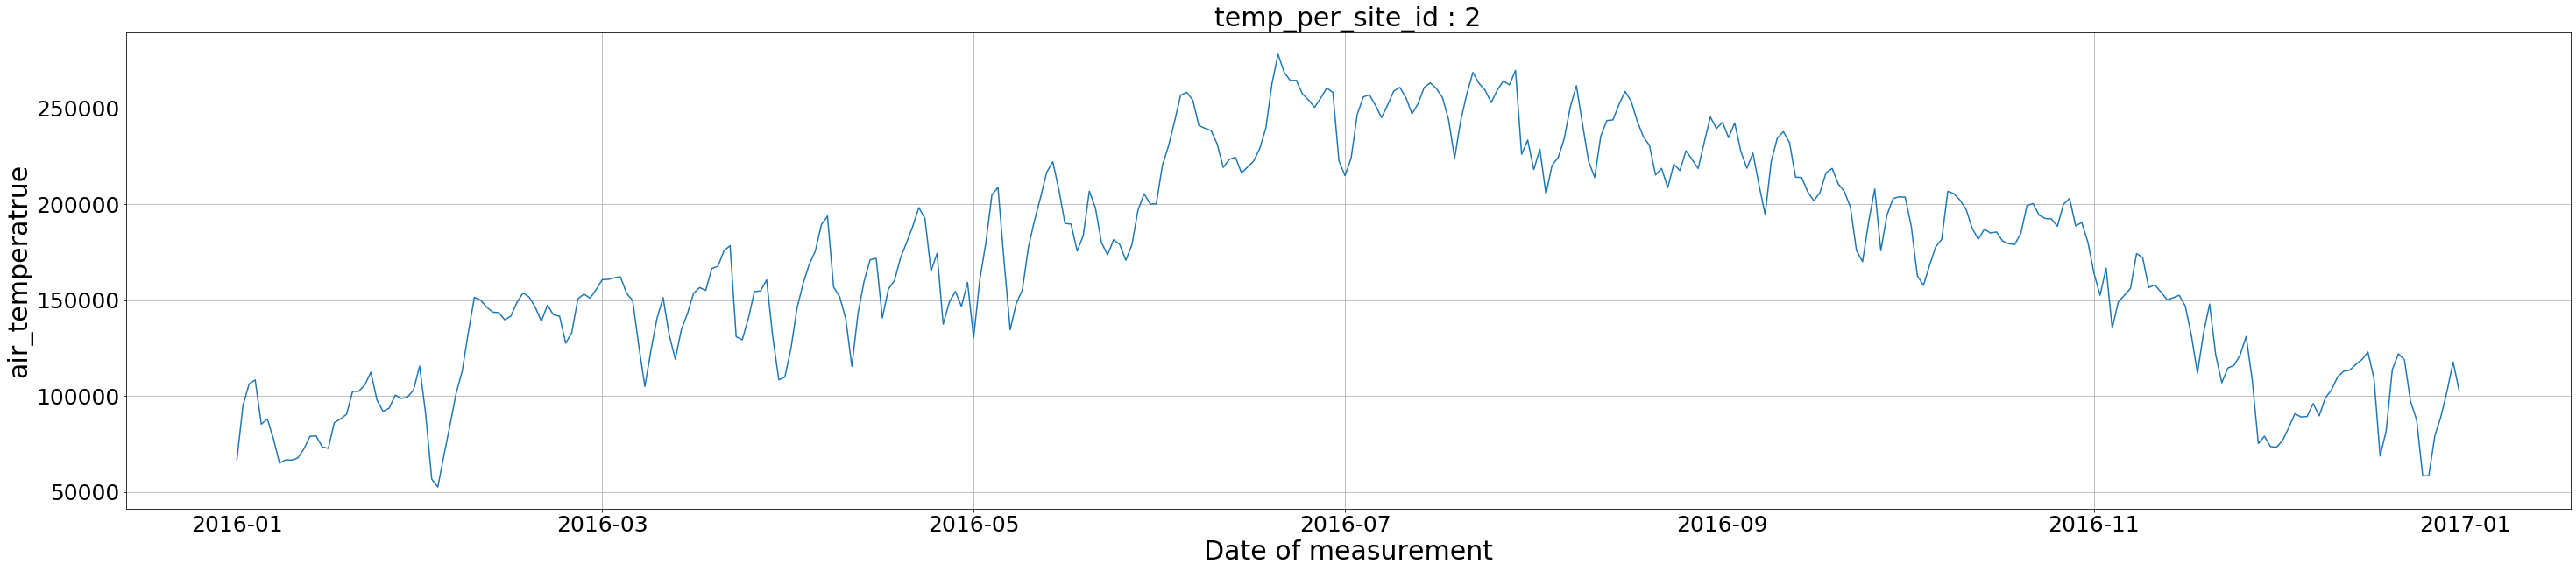

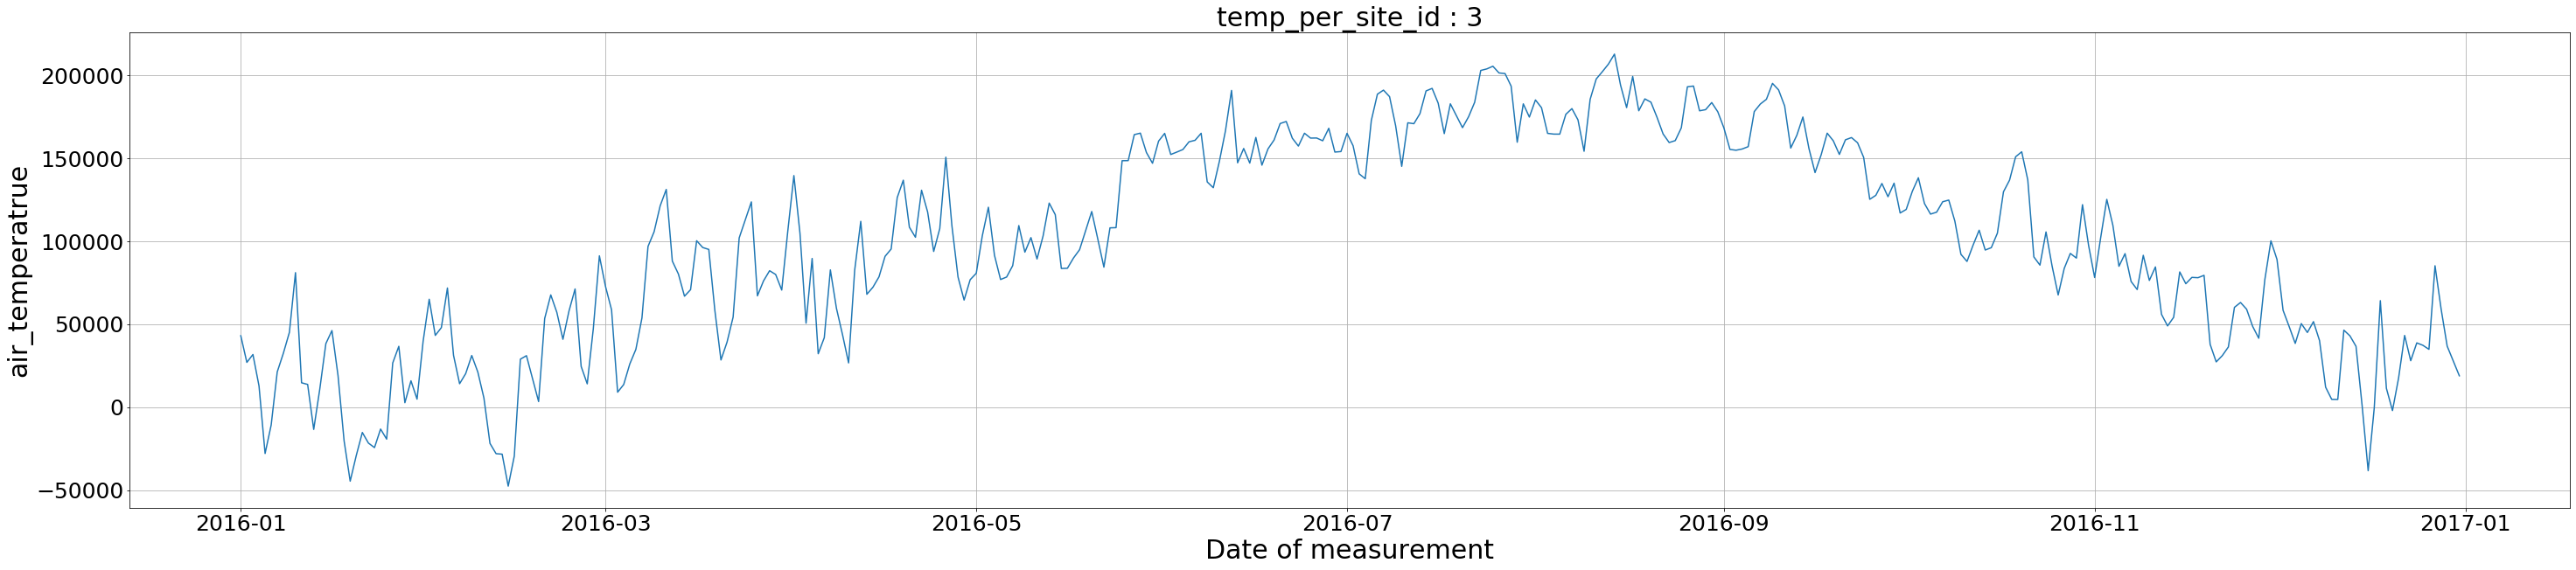

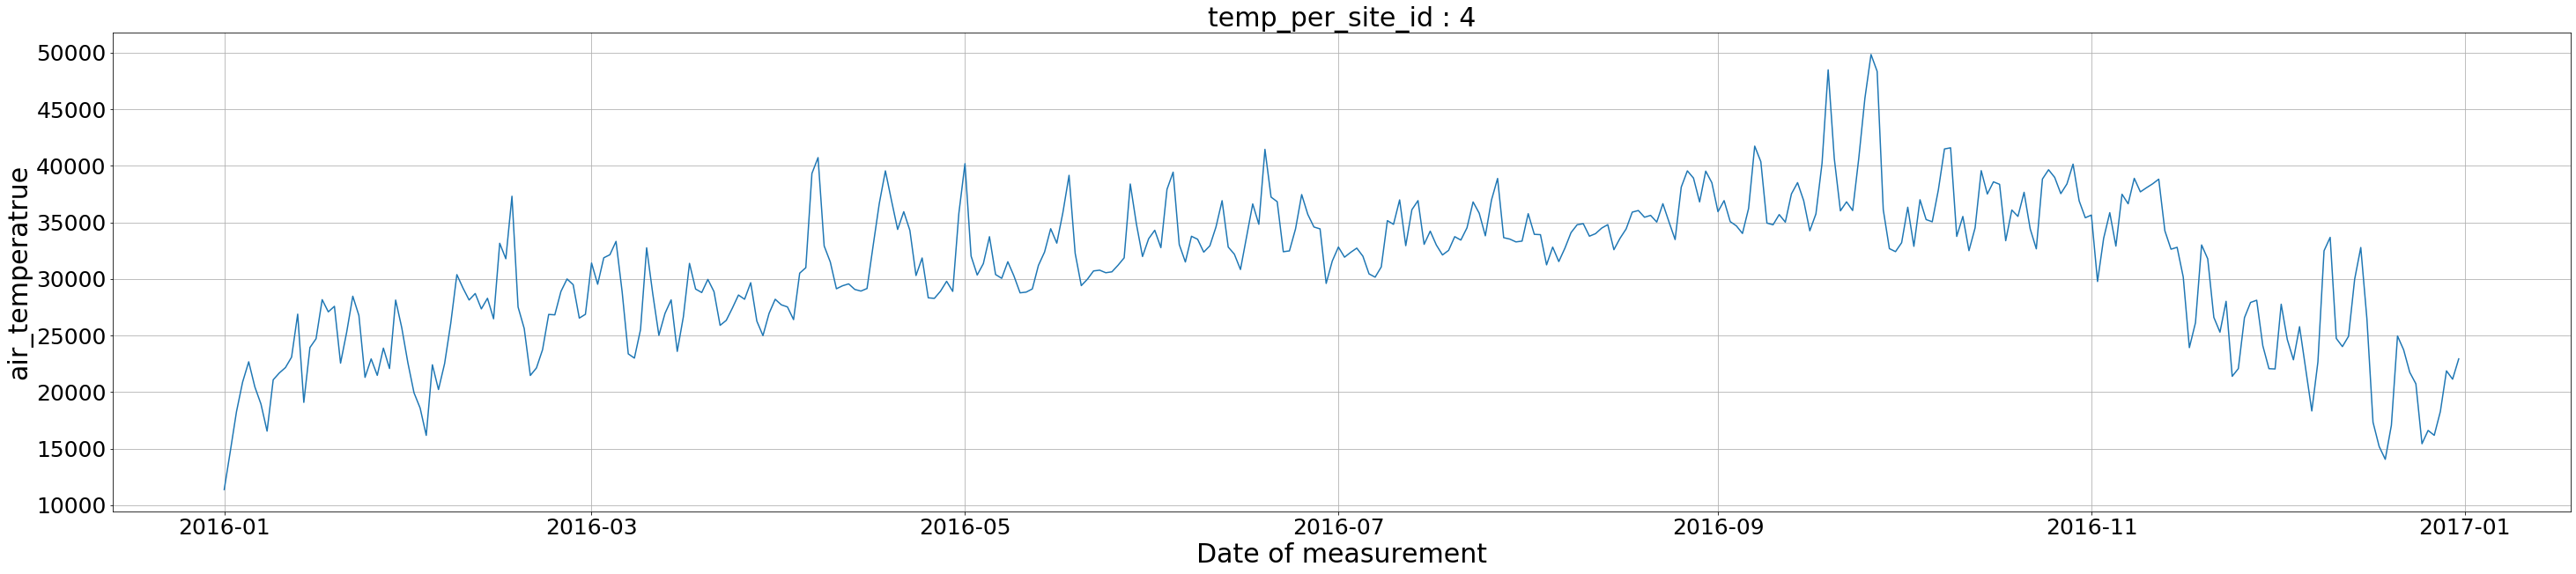

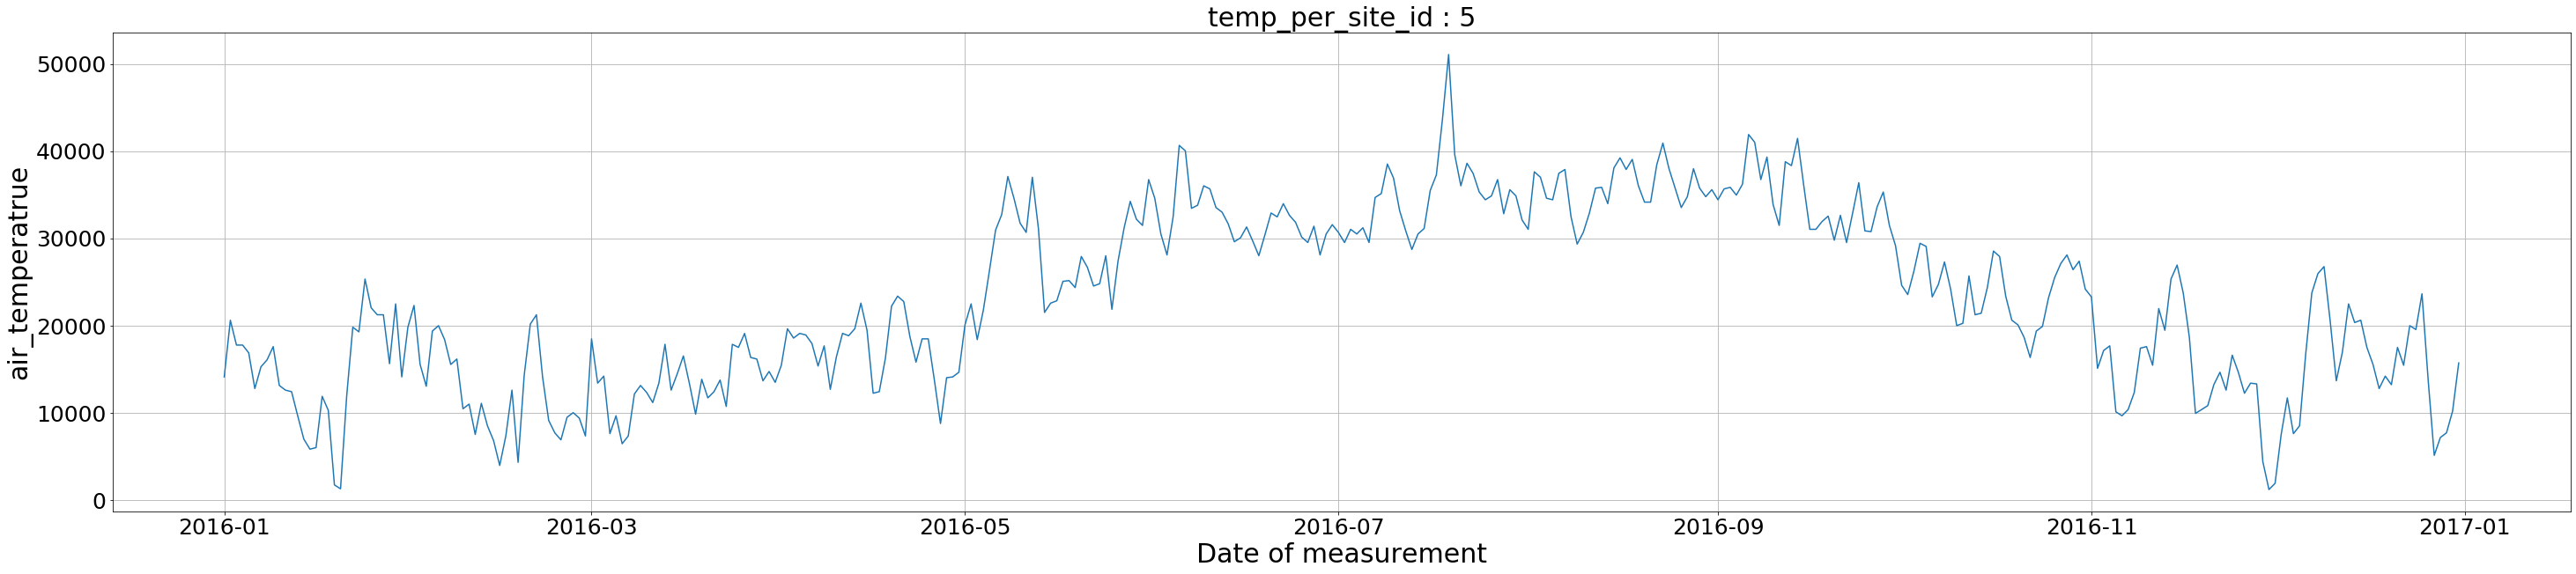

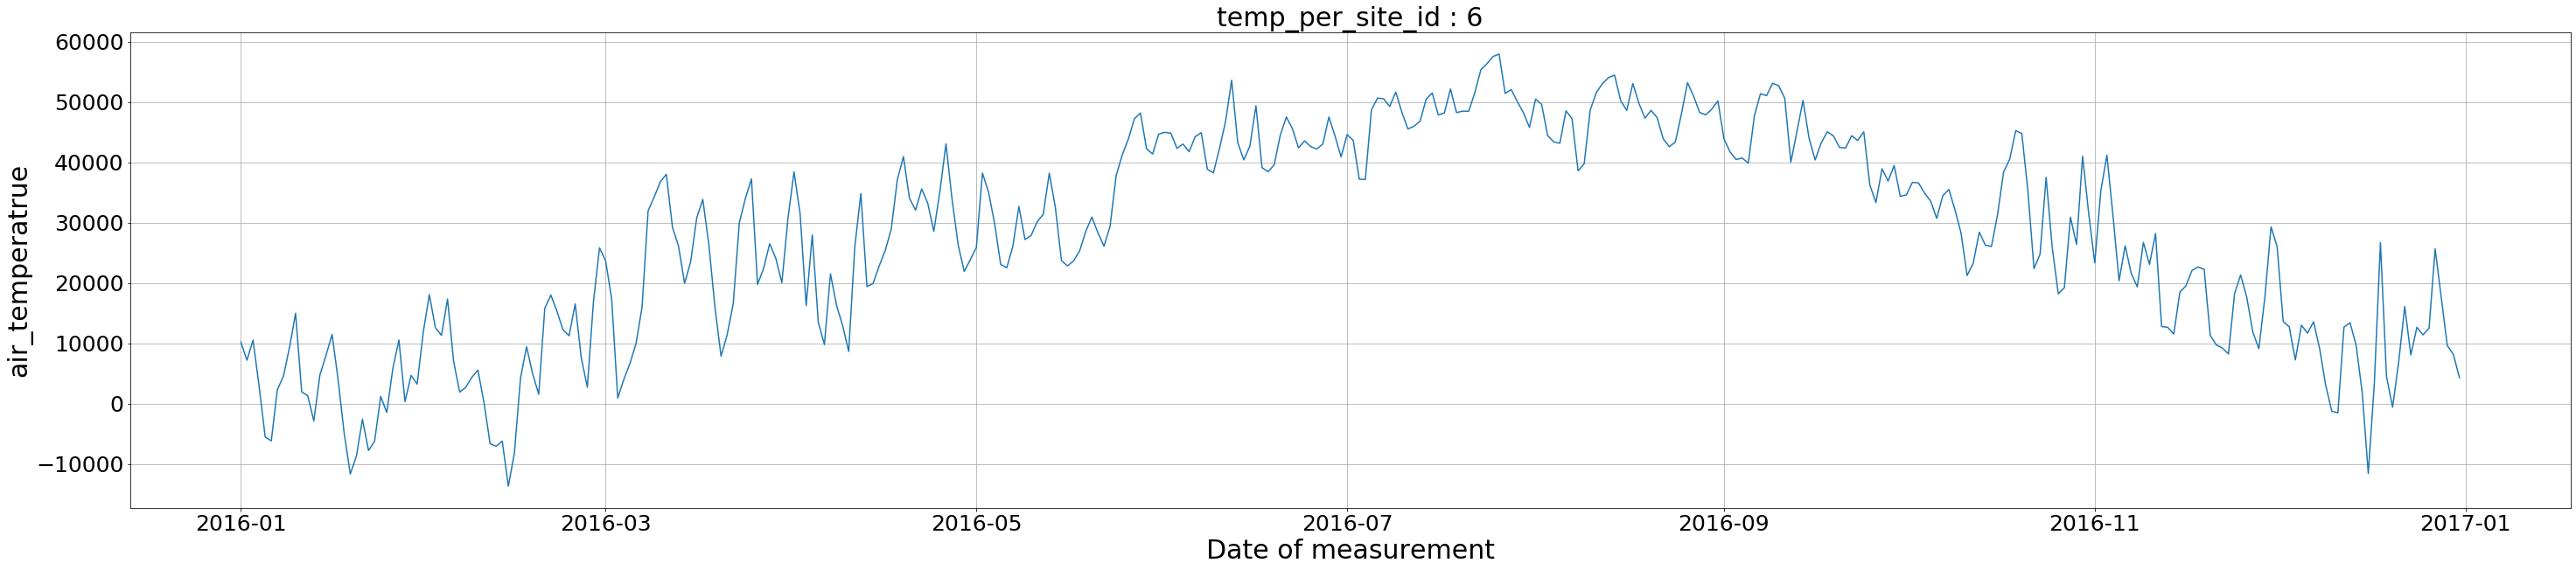

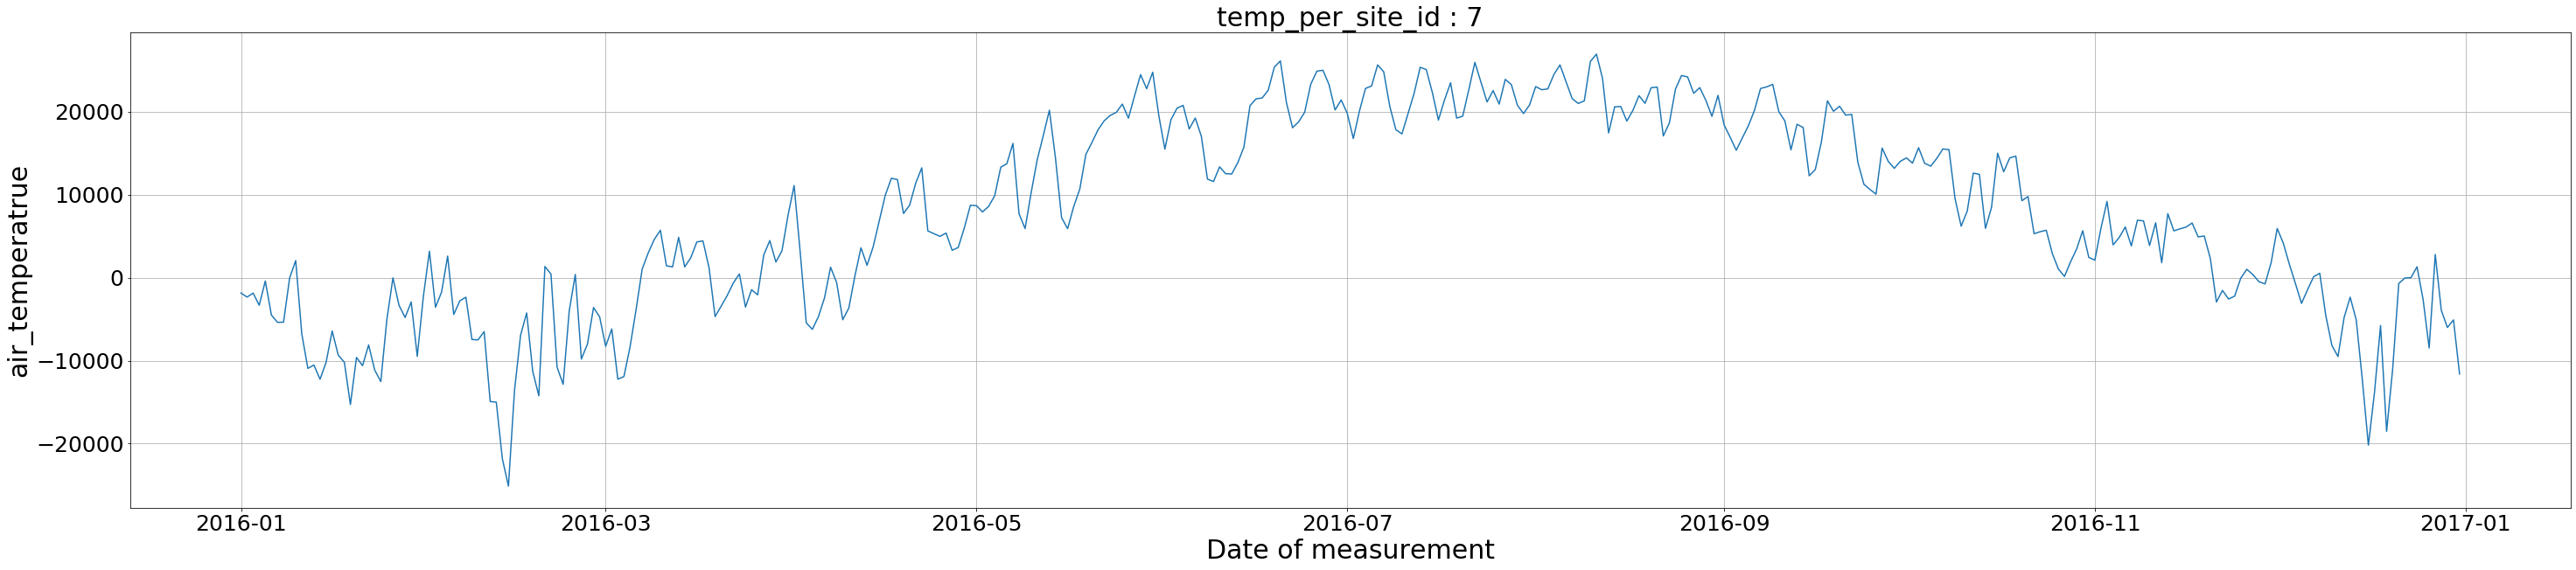

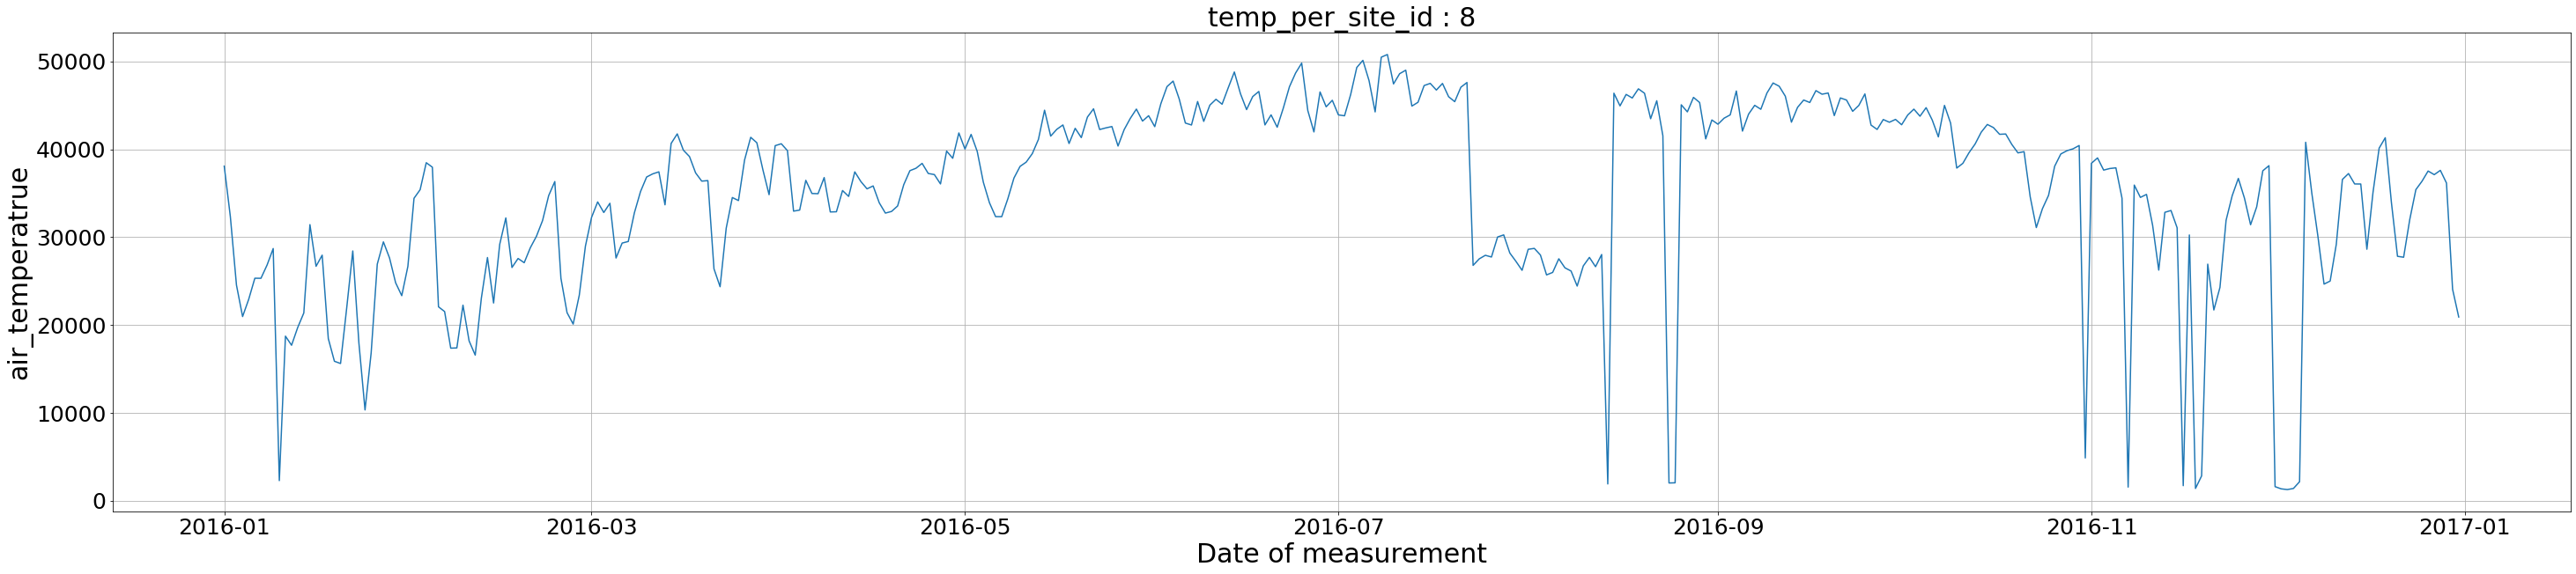

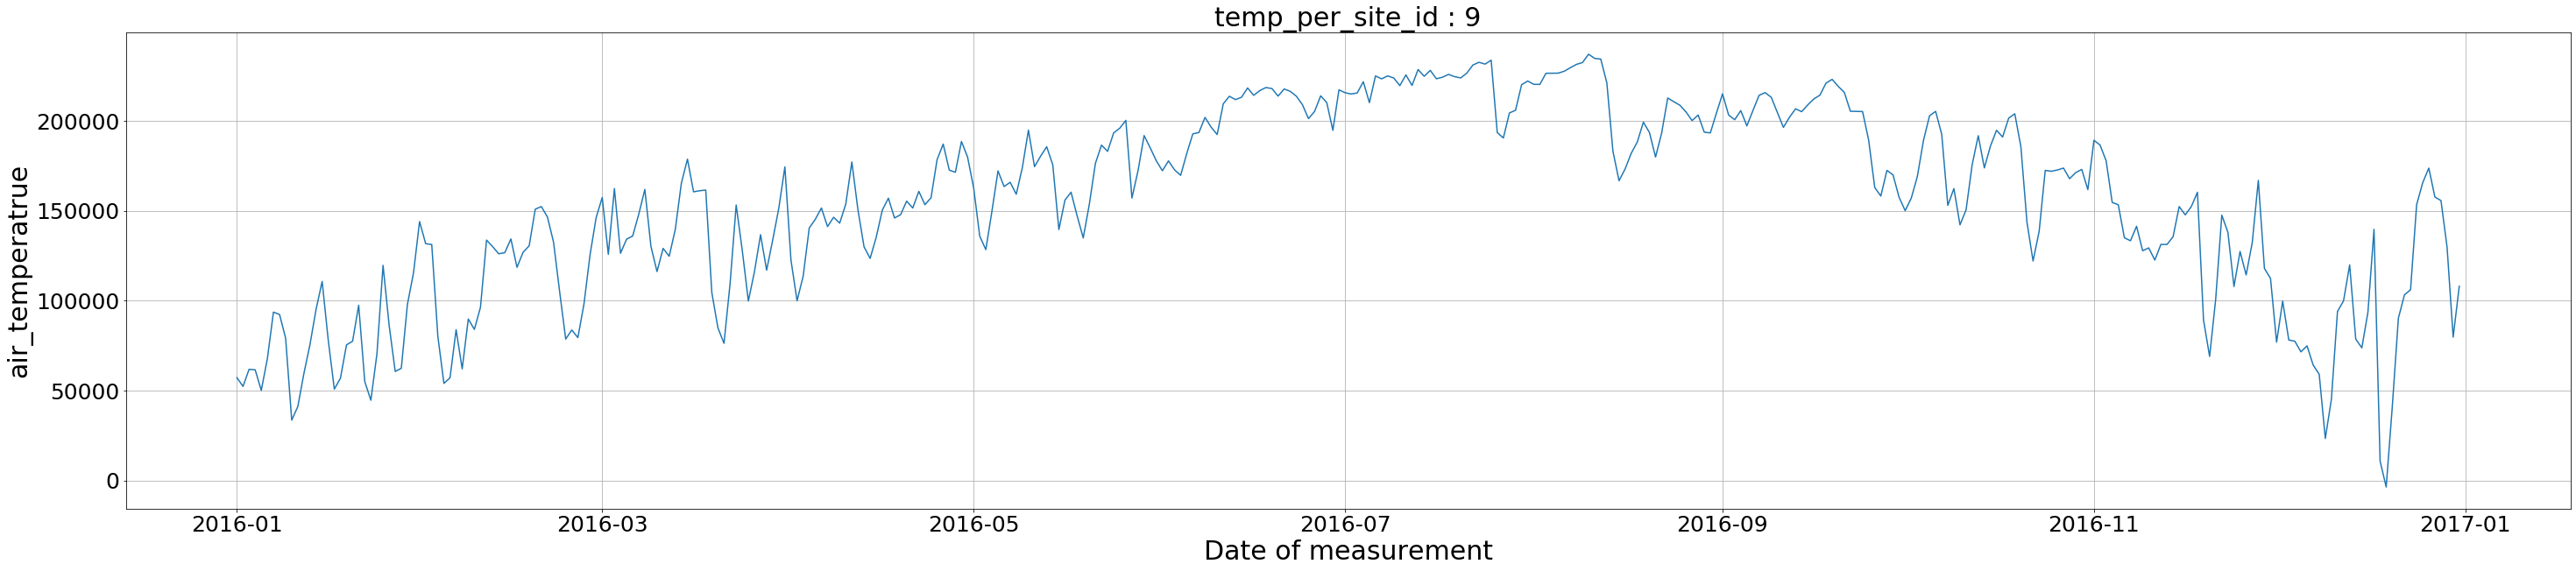

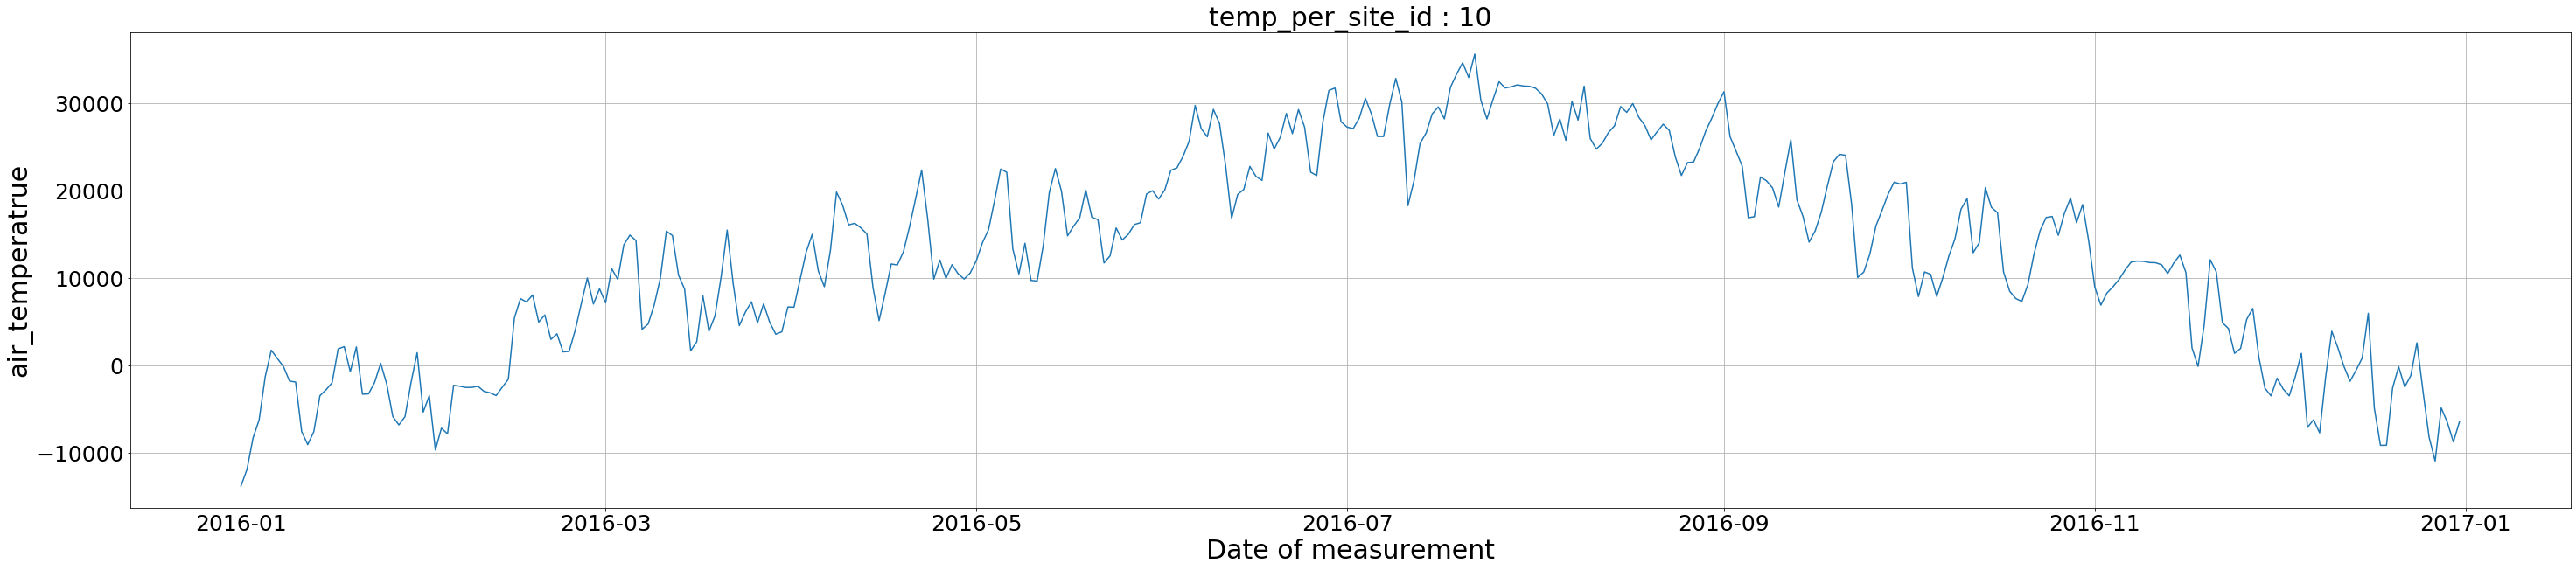

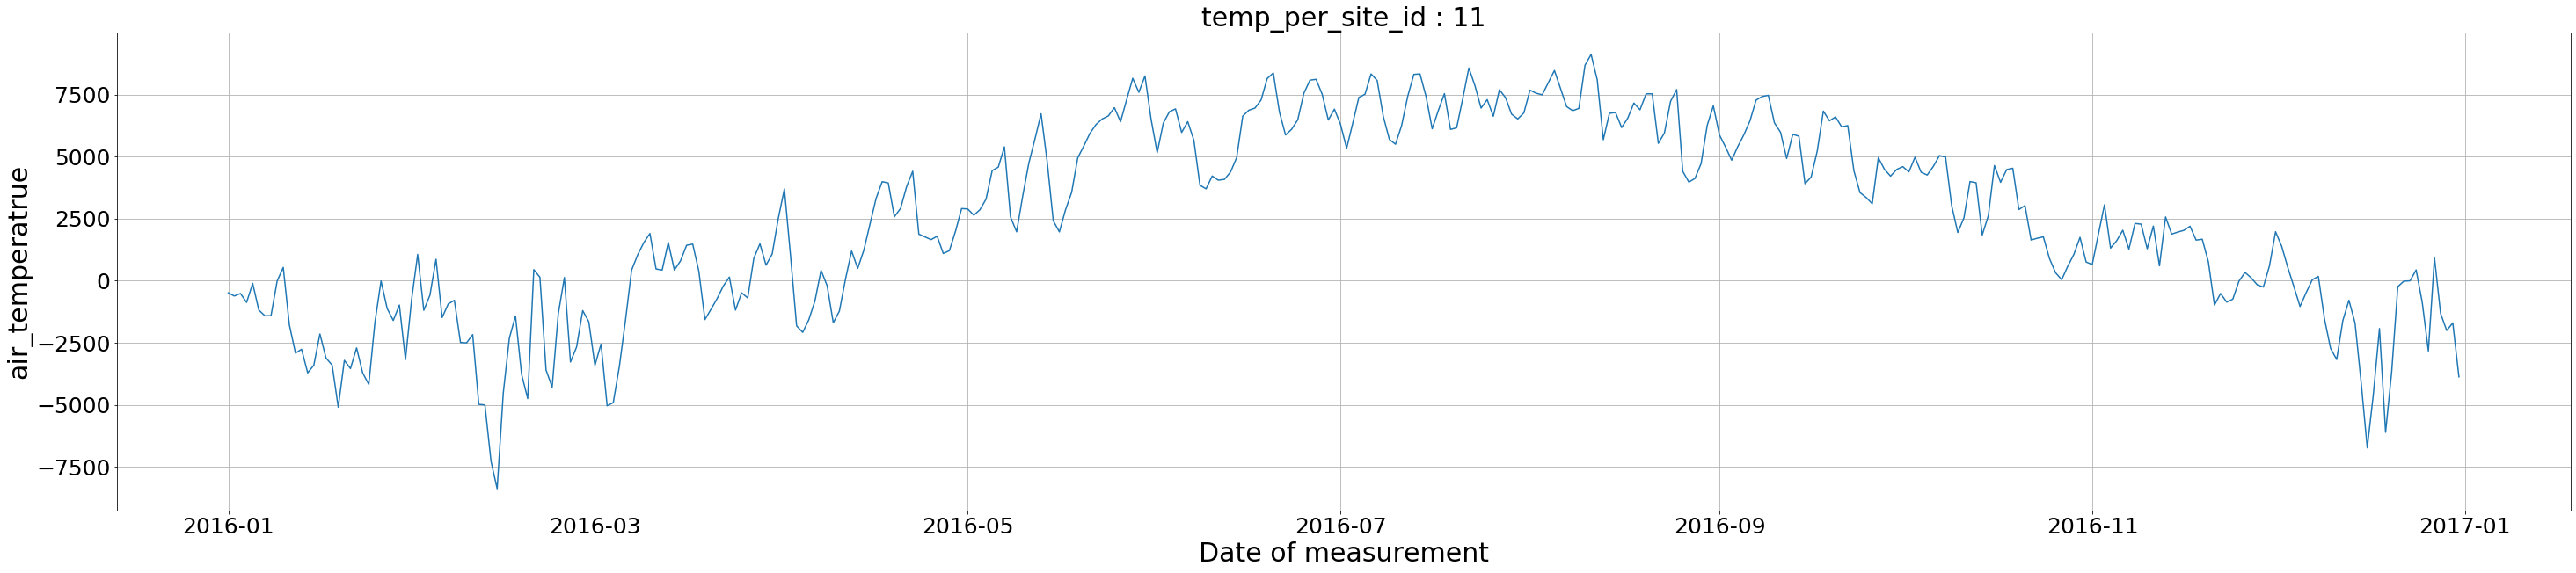

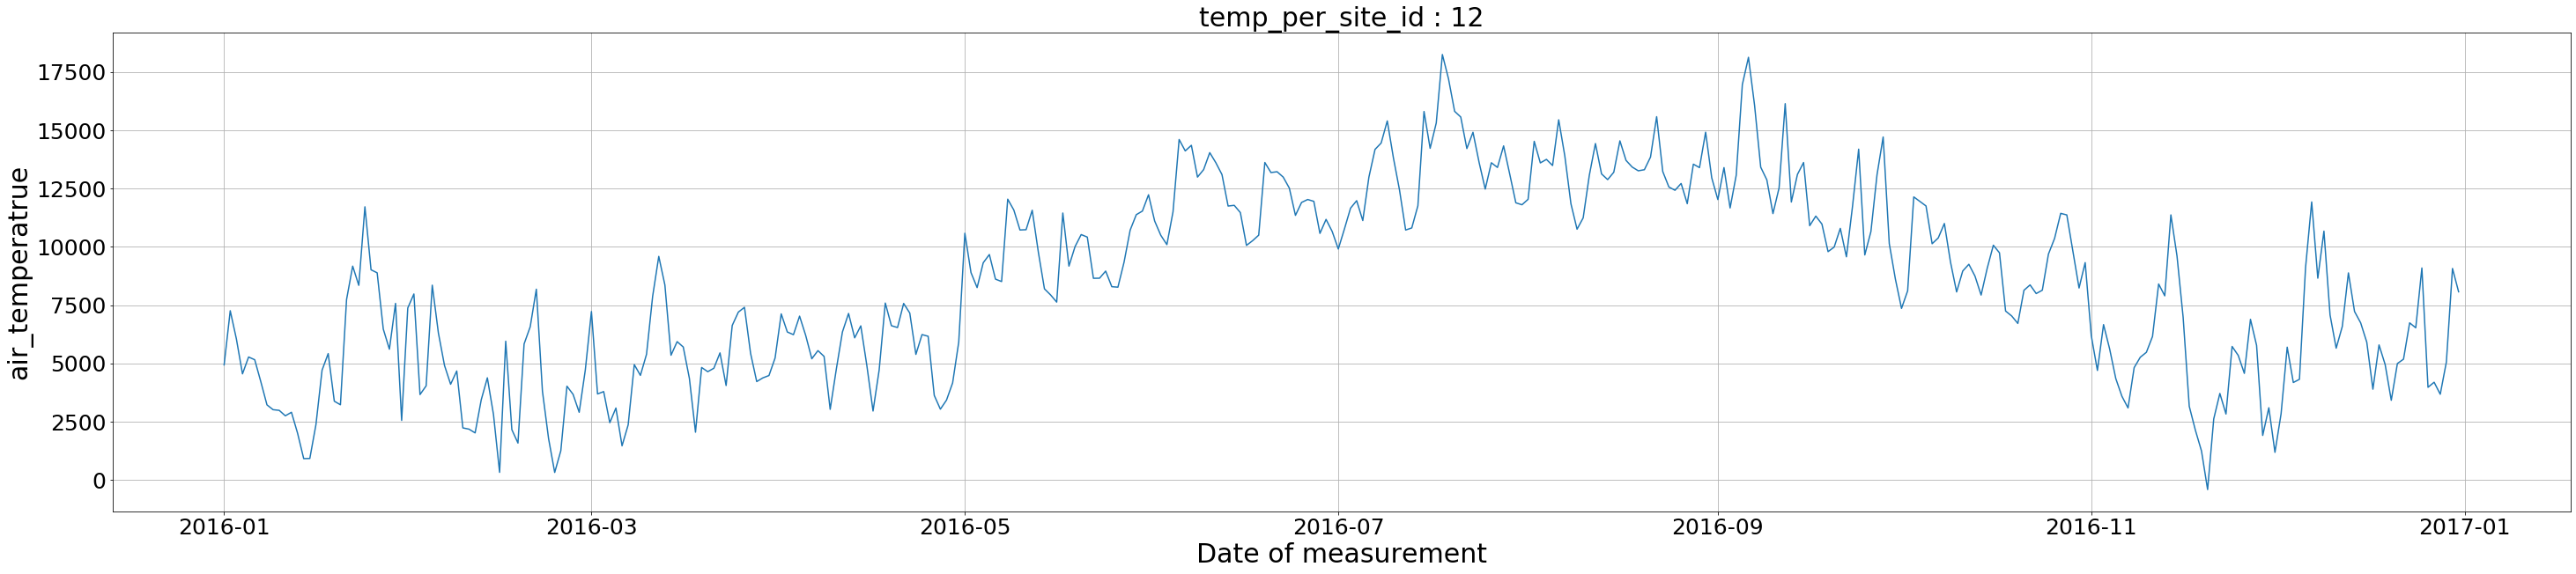

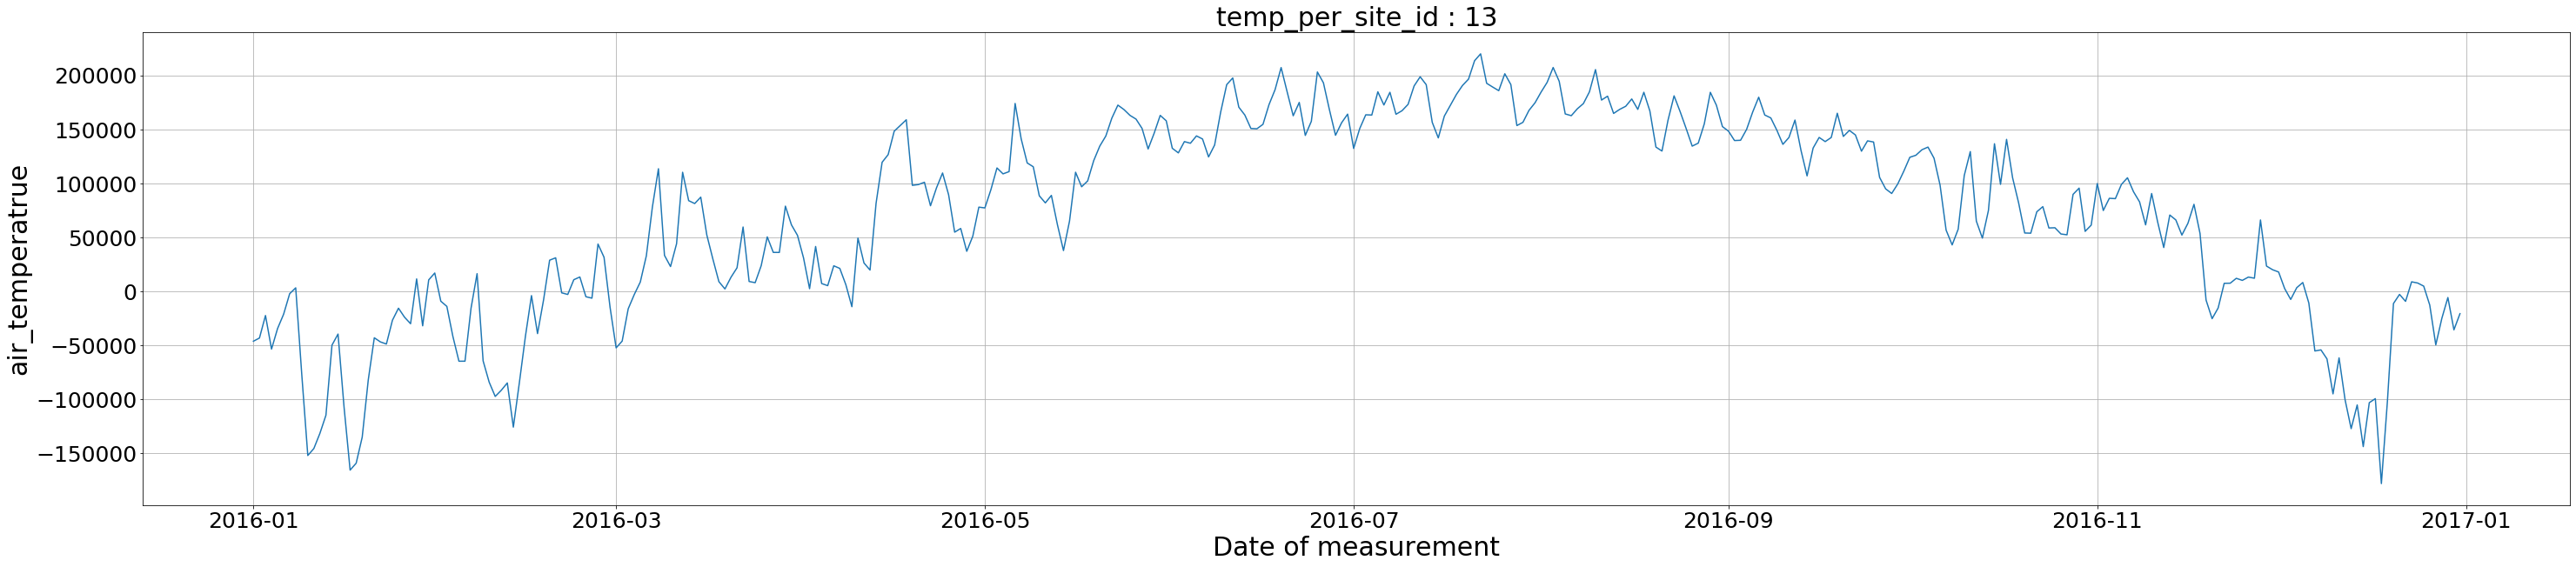

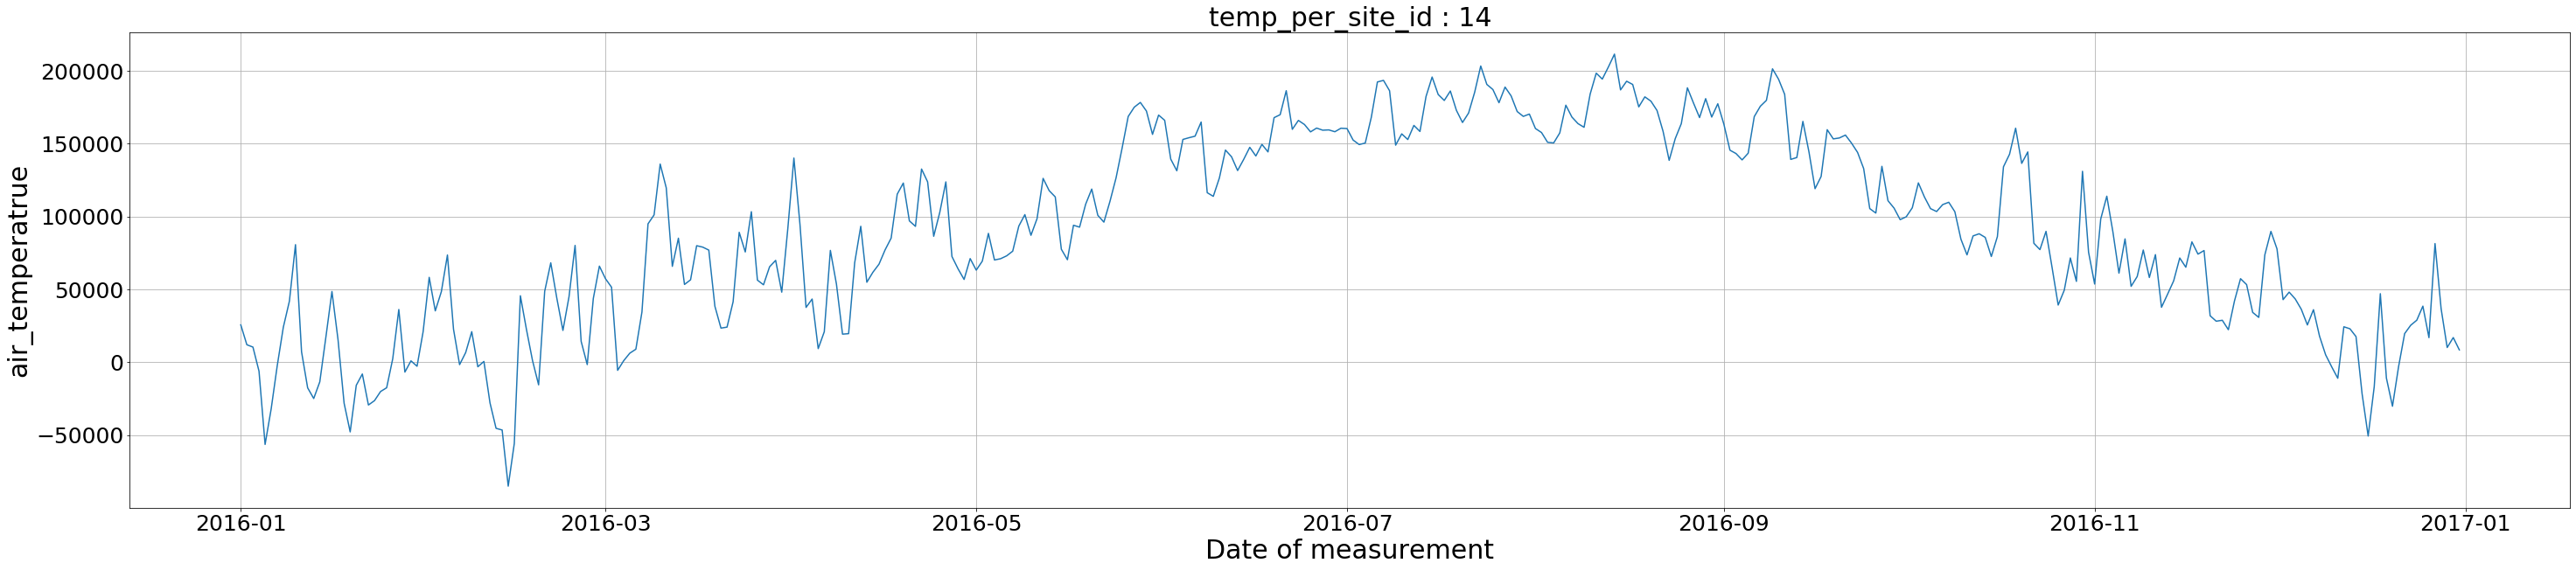

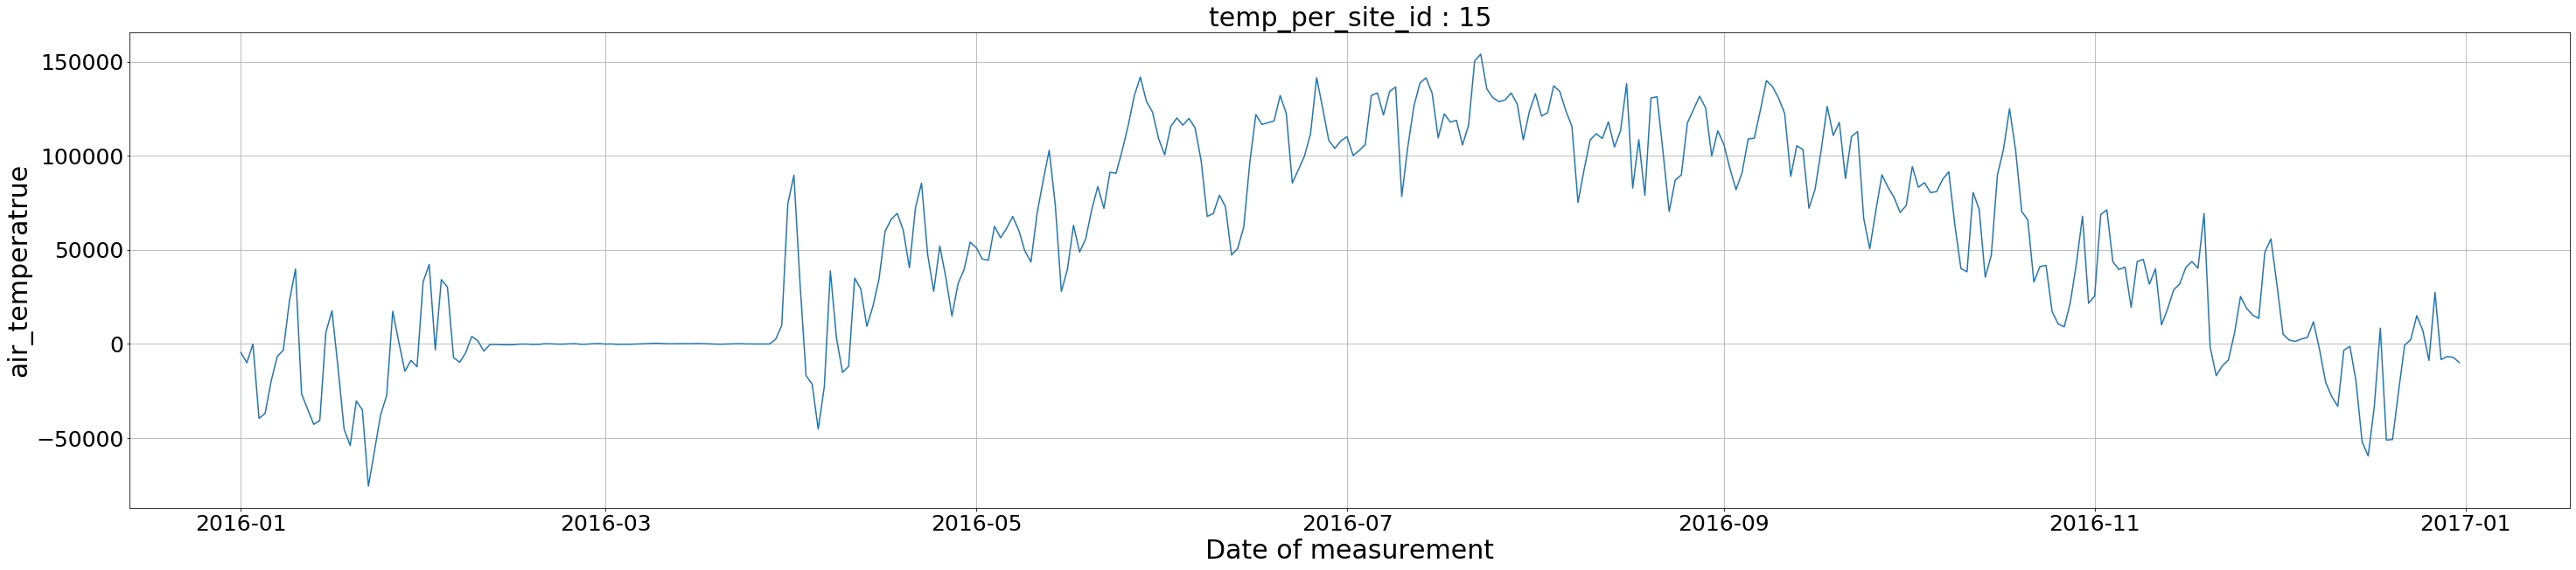

In [46]:
for j in range(16):
        fig = plt.figure(figsize=(50,10))
        plt.rc('xtick',labelsize=25)
        plt.rc('ytick',labelsize=25)
        plt.title('temp_per_site_id : ' + str(j),fontsize=30)
        plt.grid(True)
        plt.plot(merged_data[(merged_data['site_id'] == j)].resample("D").sum()['air_temperature']) 
        plt.xlabel("Date of measurement",fontsize=30)
        plt.ylabel("air_temperatrue",fontsize=30)
        plt.savefig('temp_per_site_id'+str(j),dpi=300)
        plt.show()

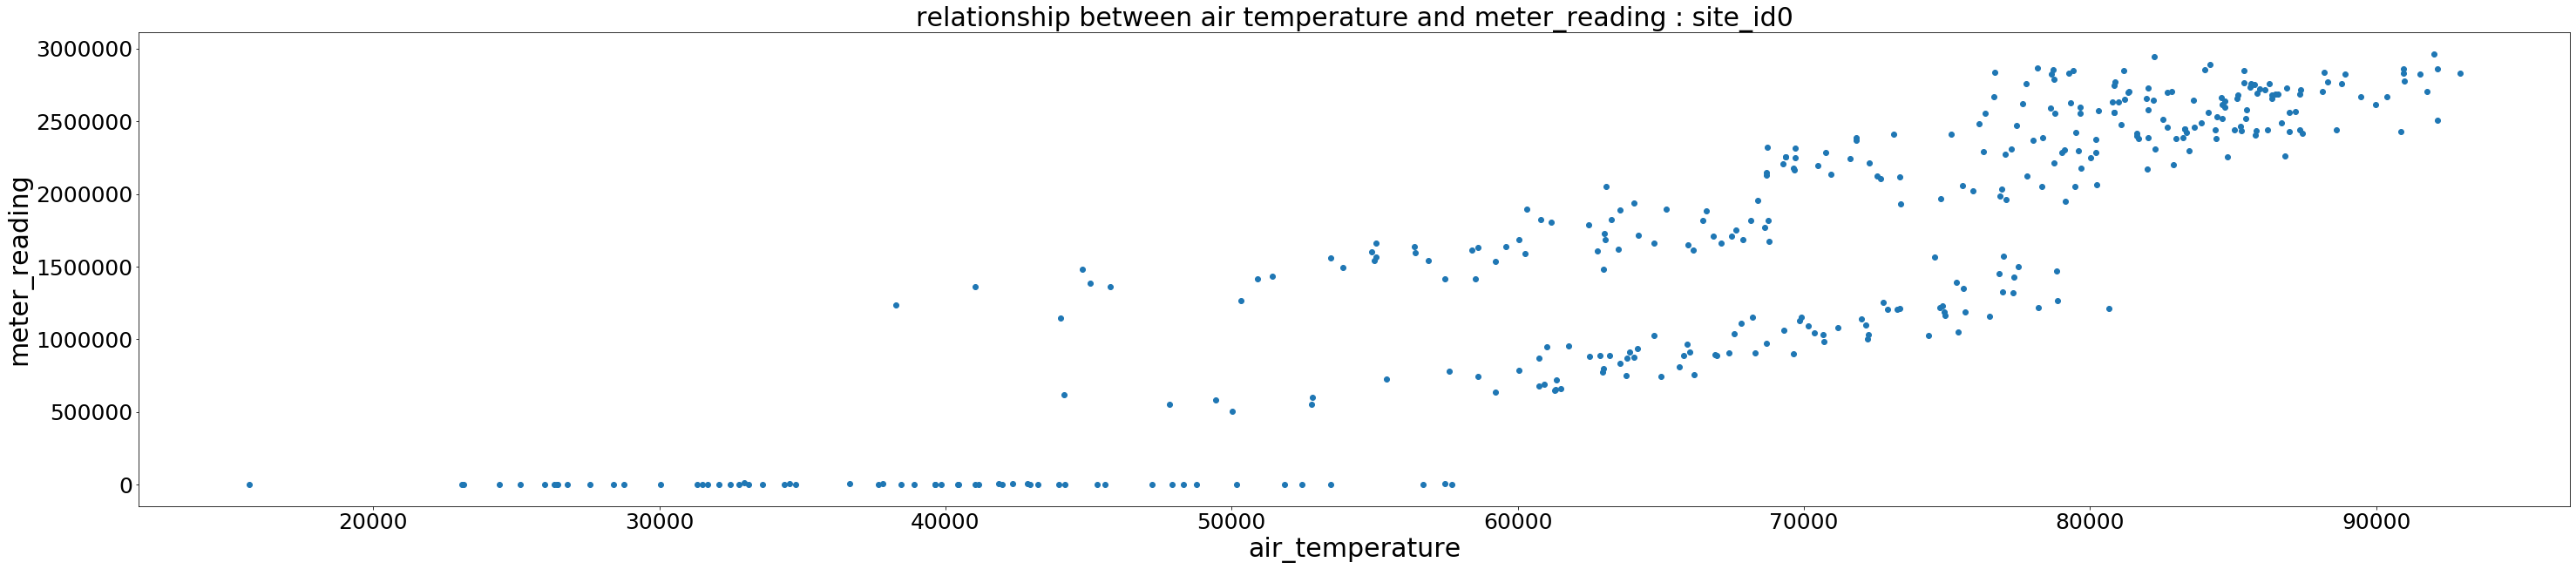

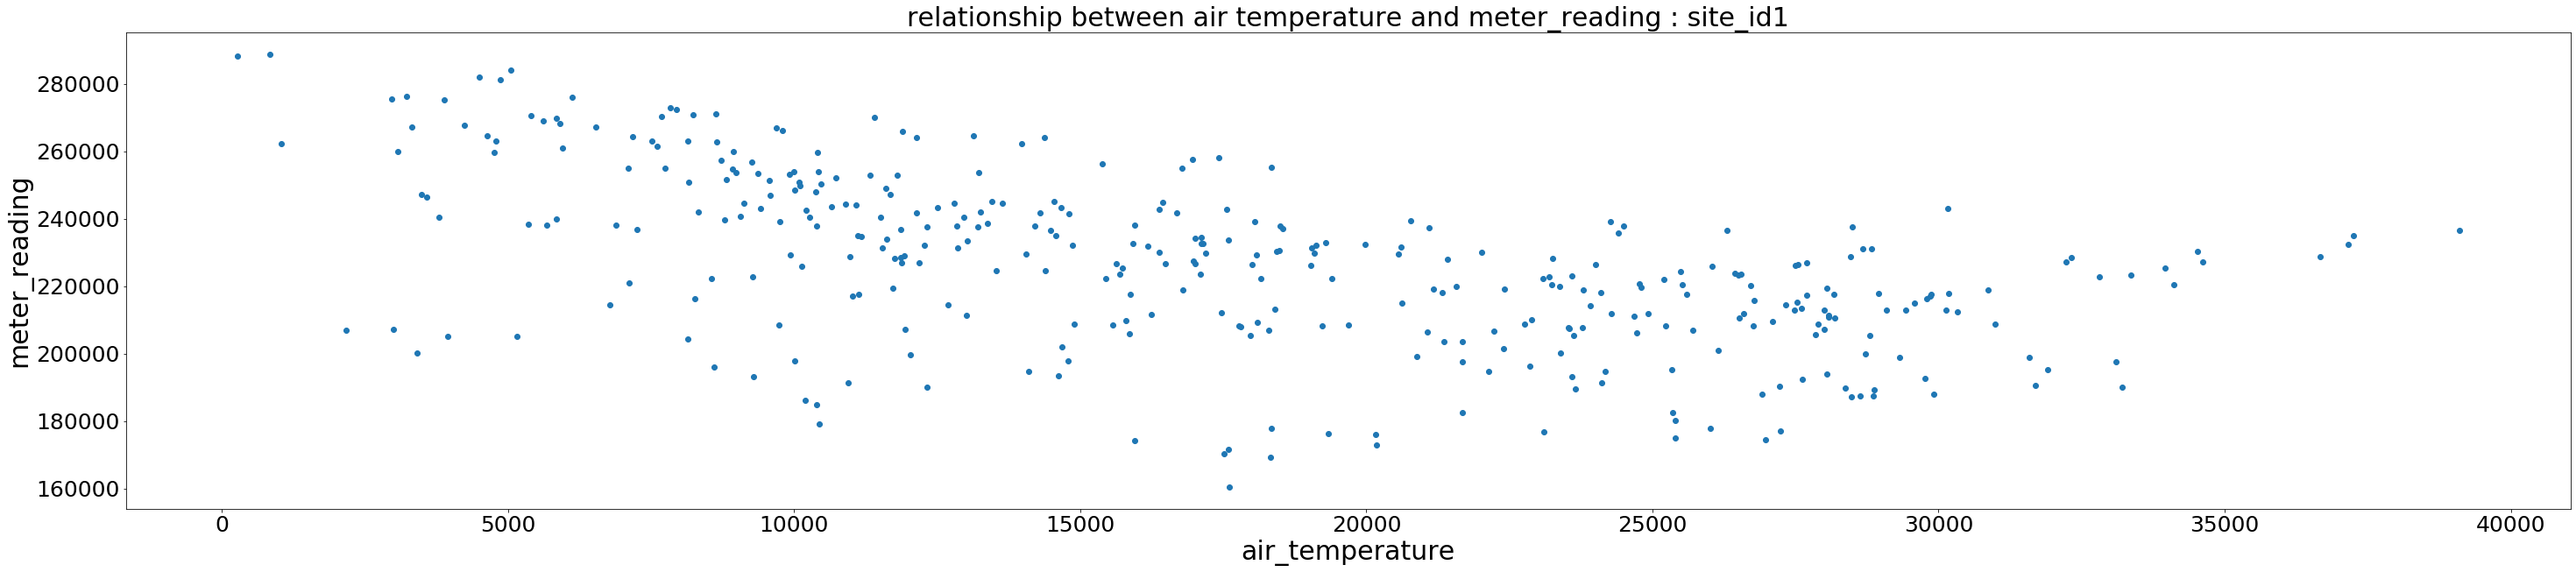

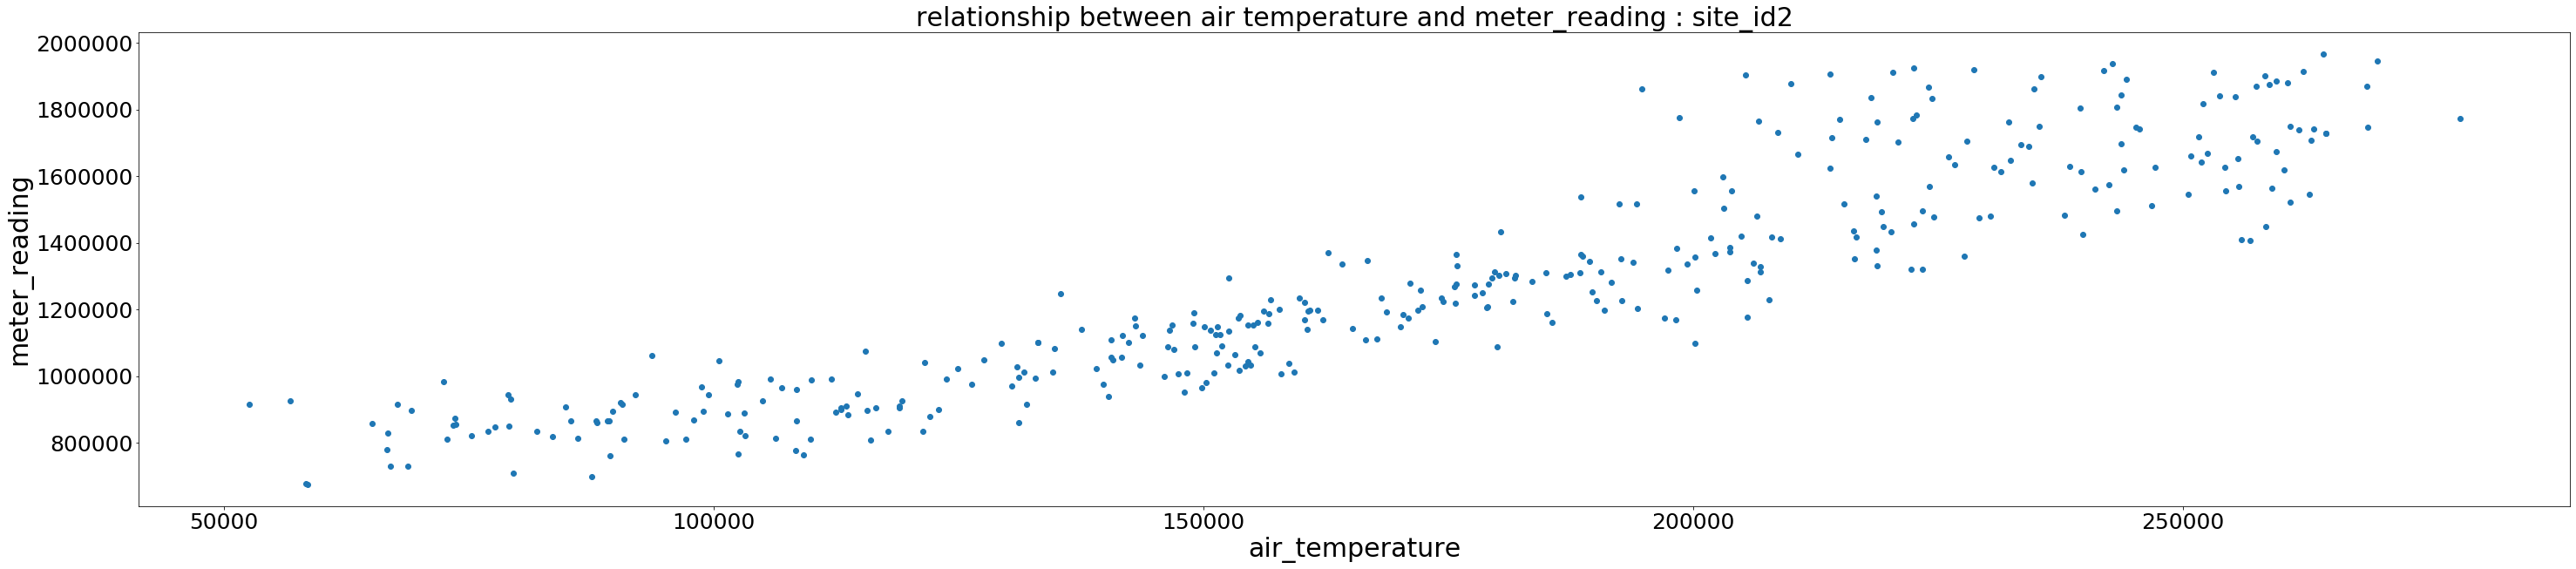

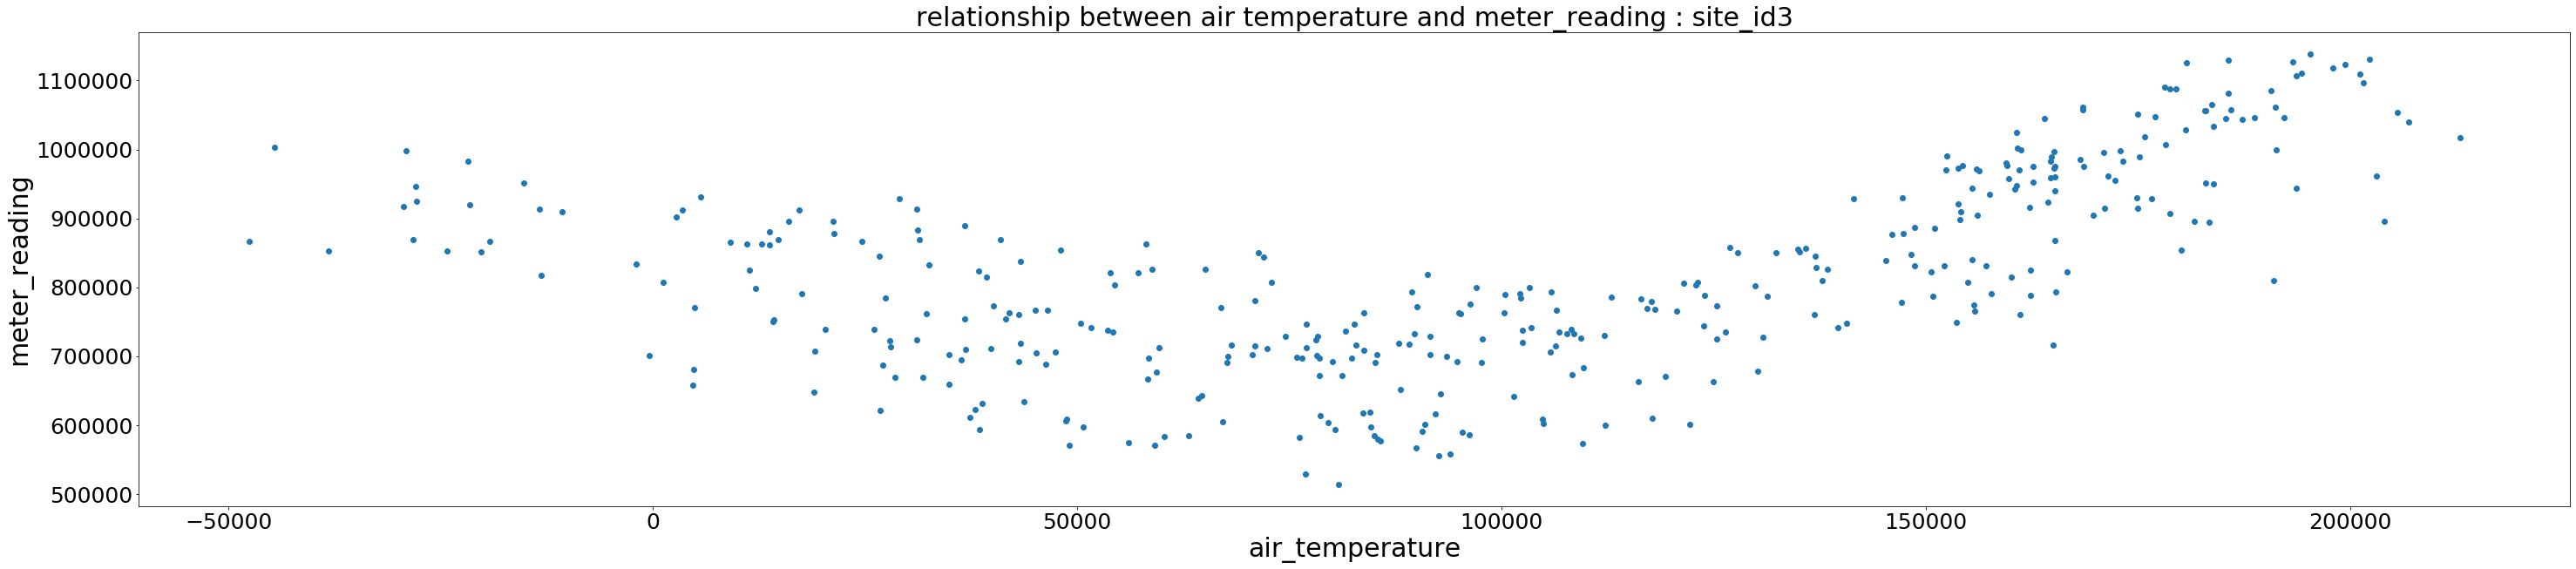

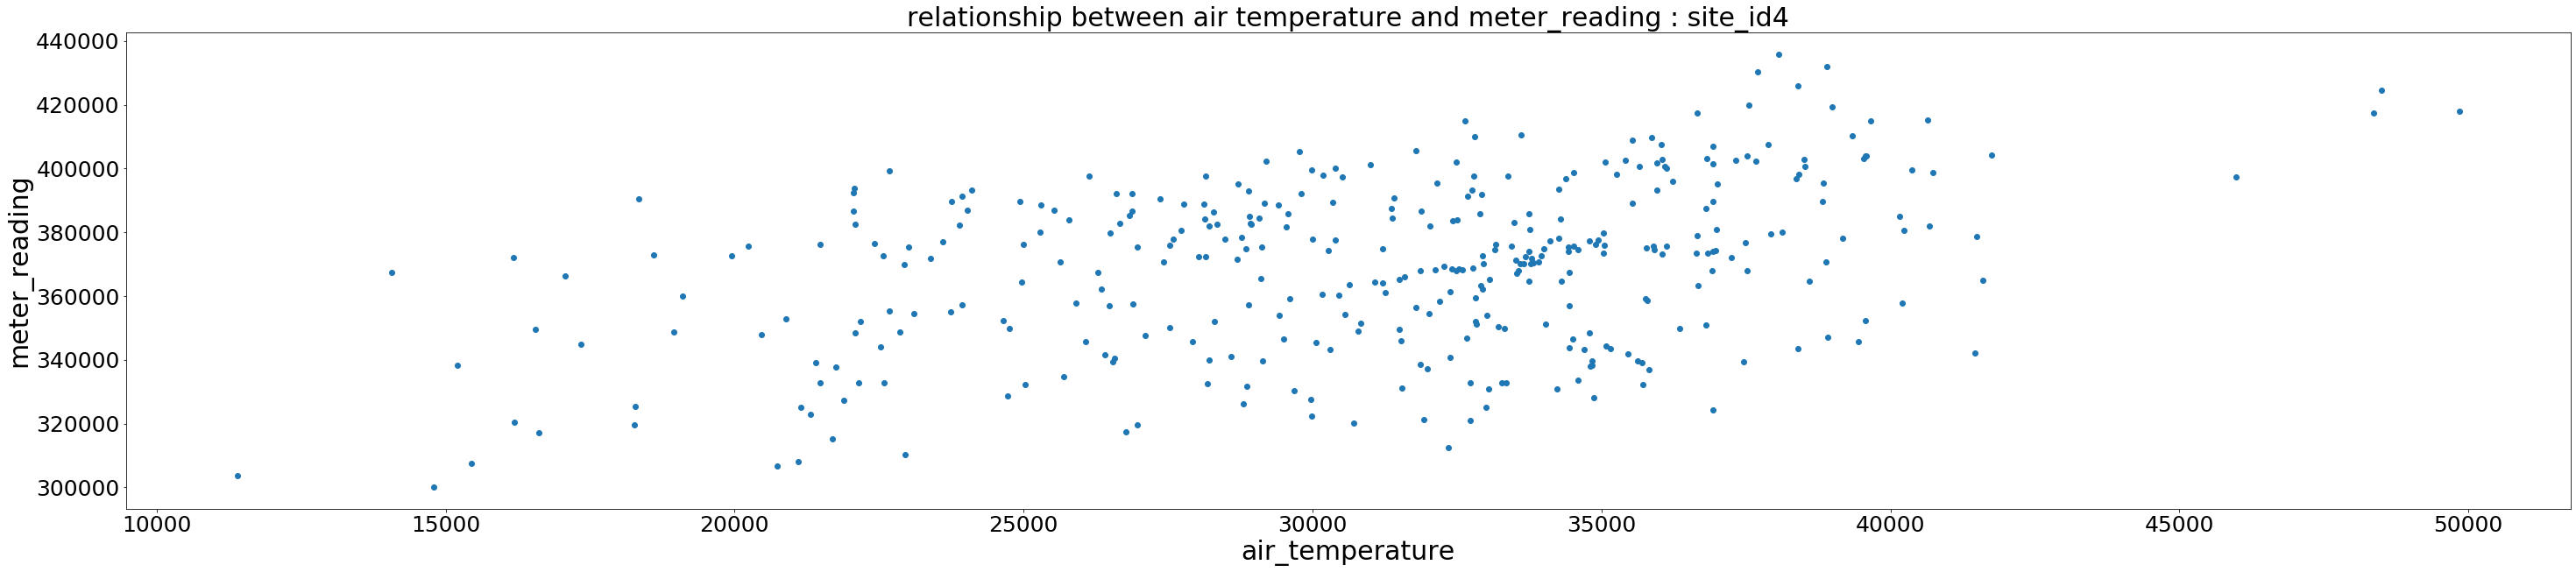

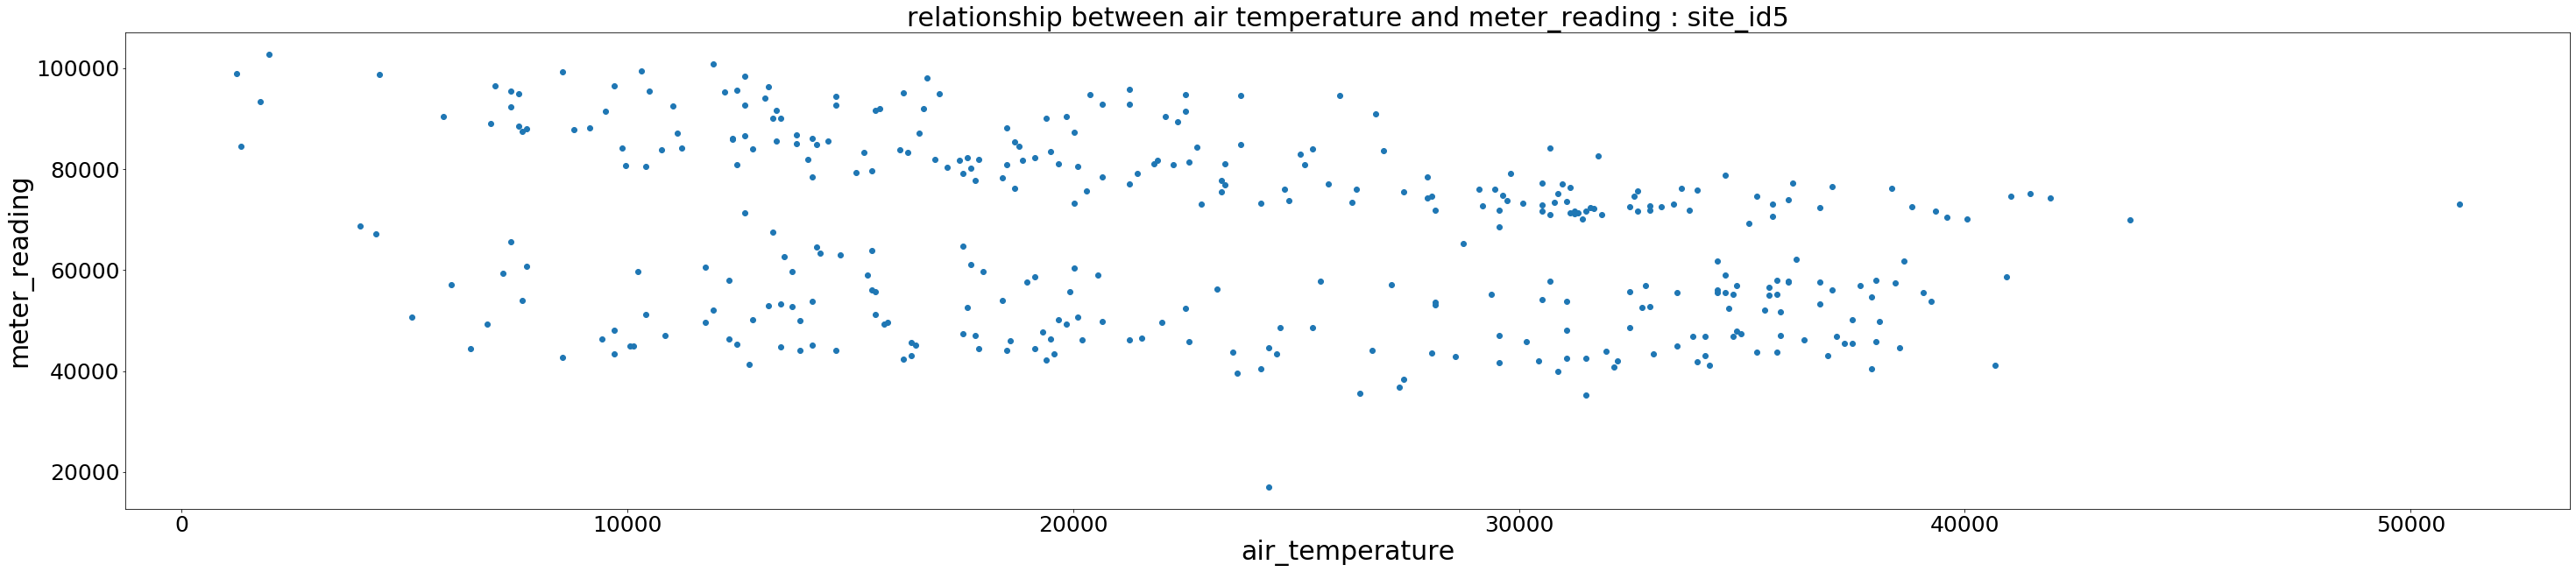

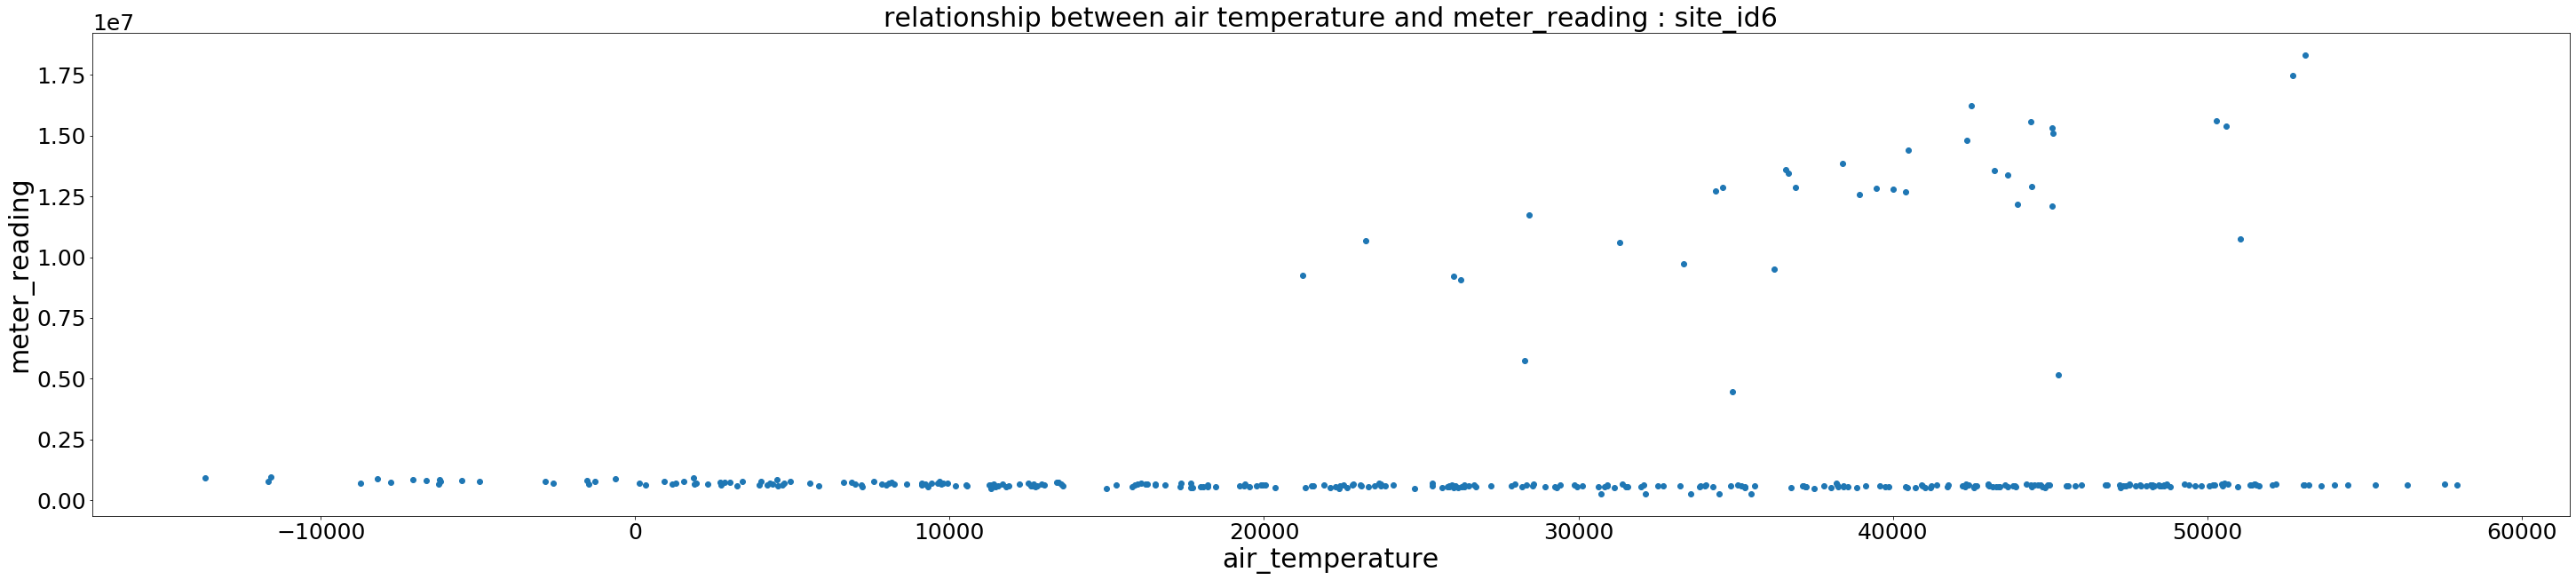

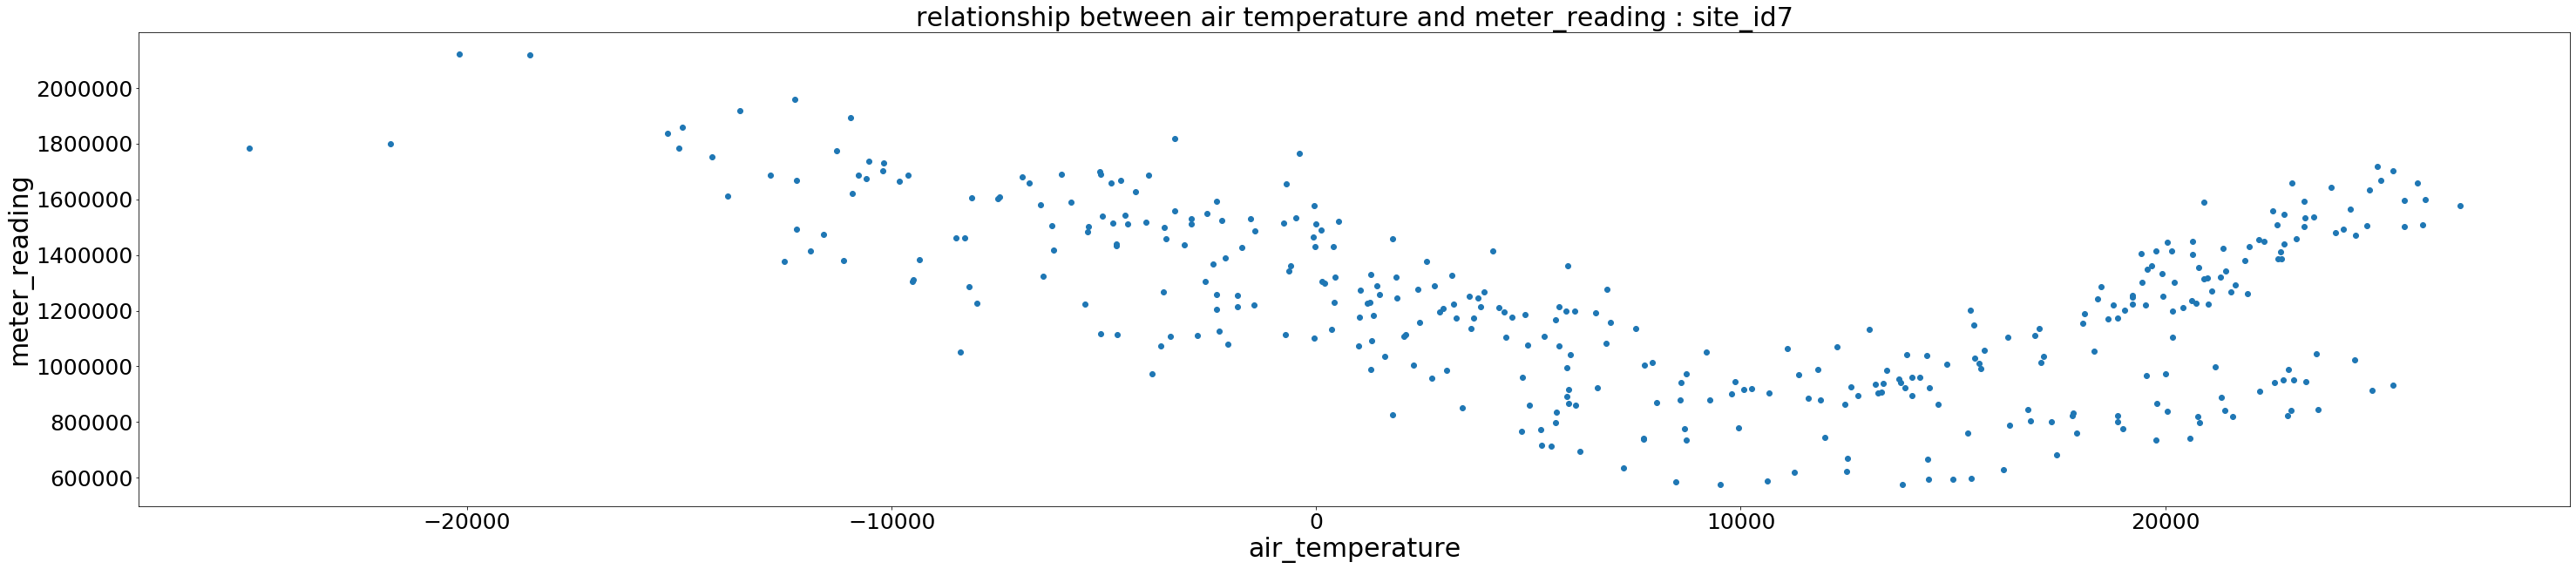

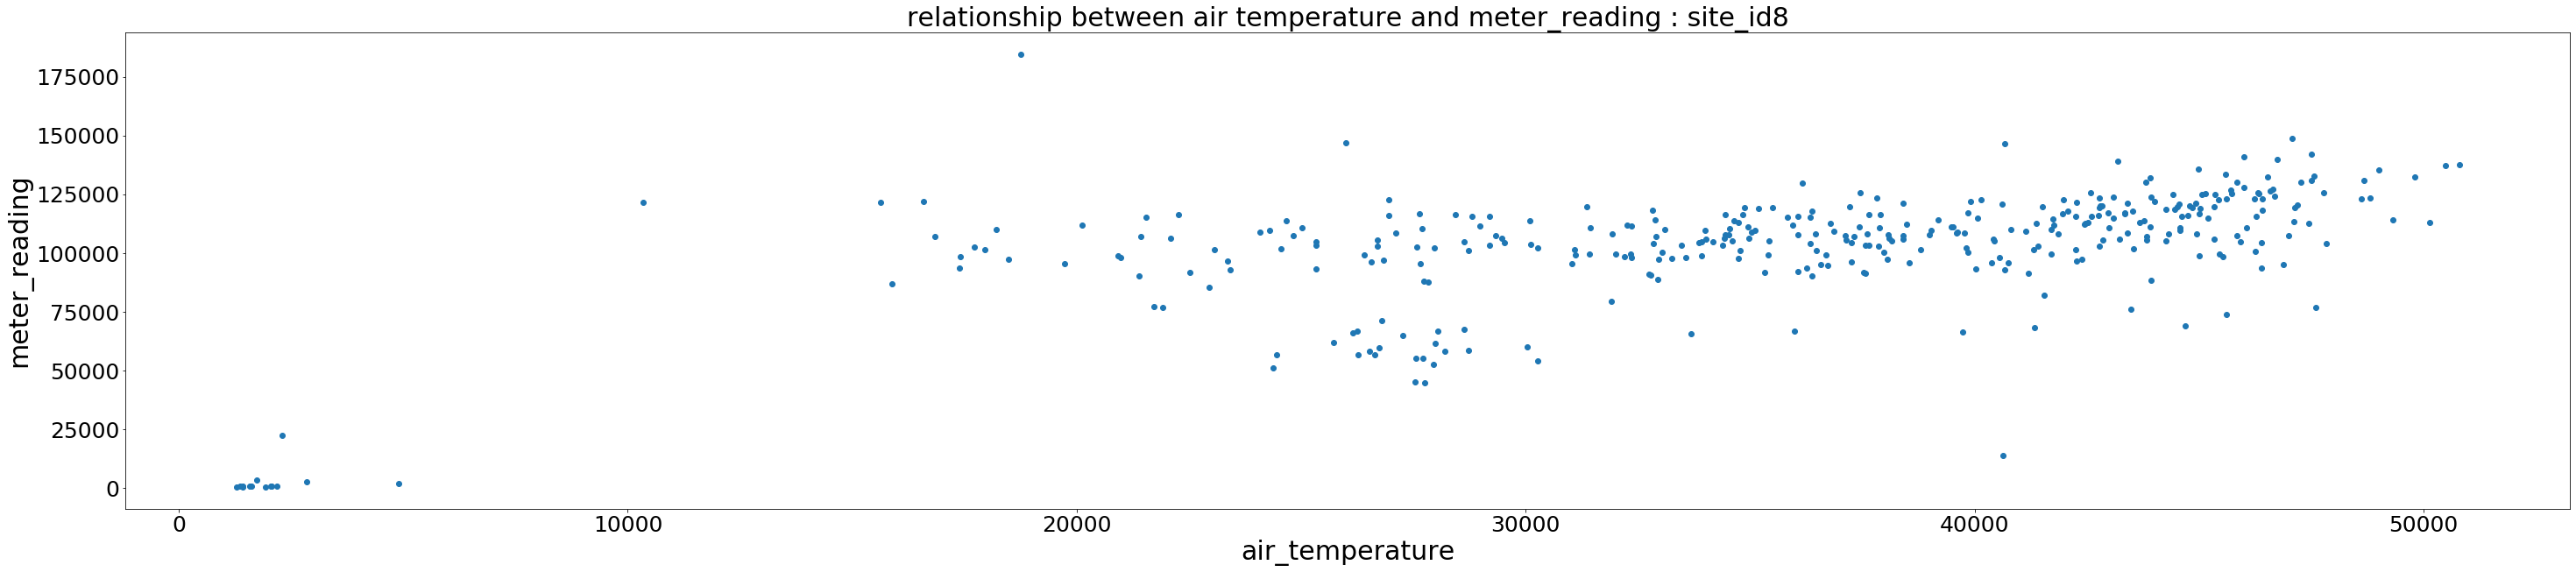

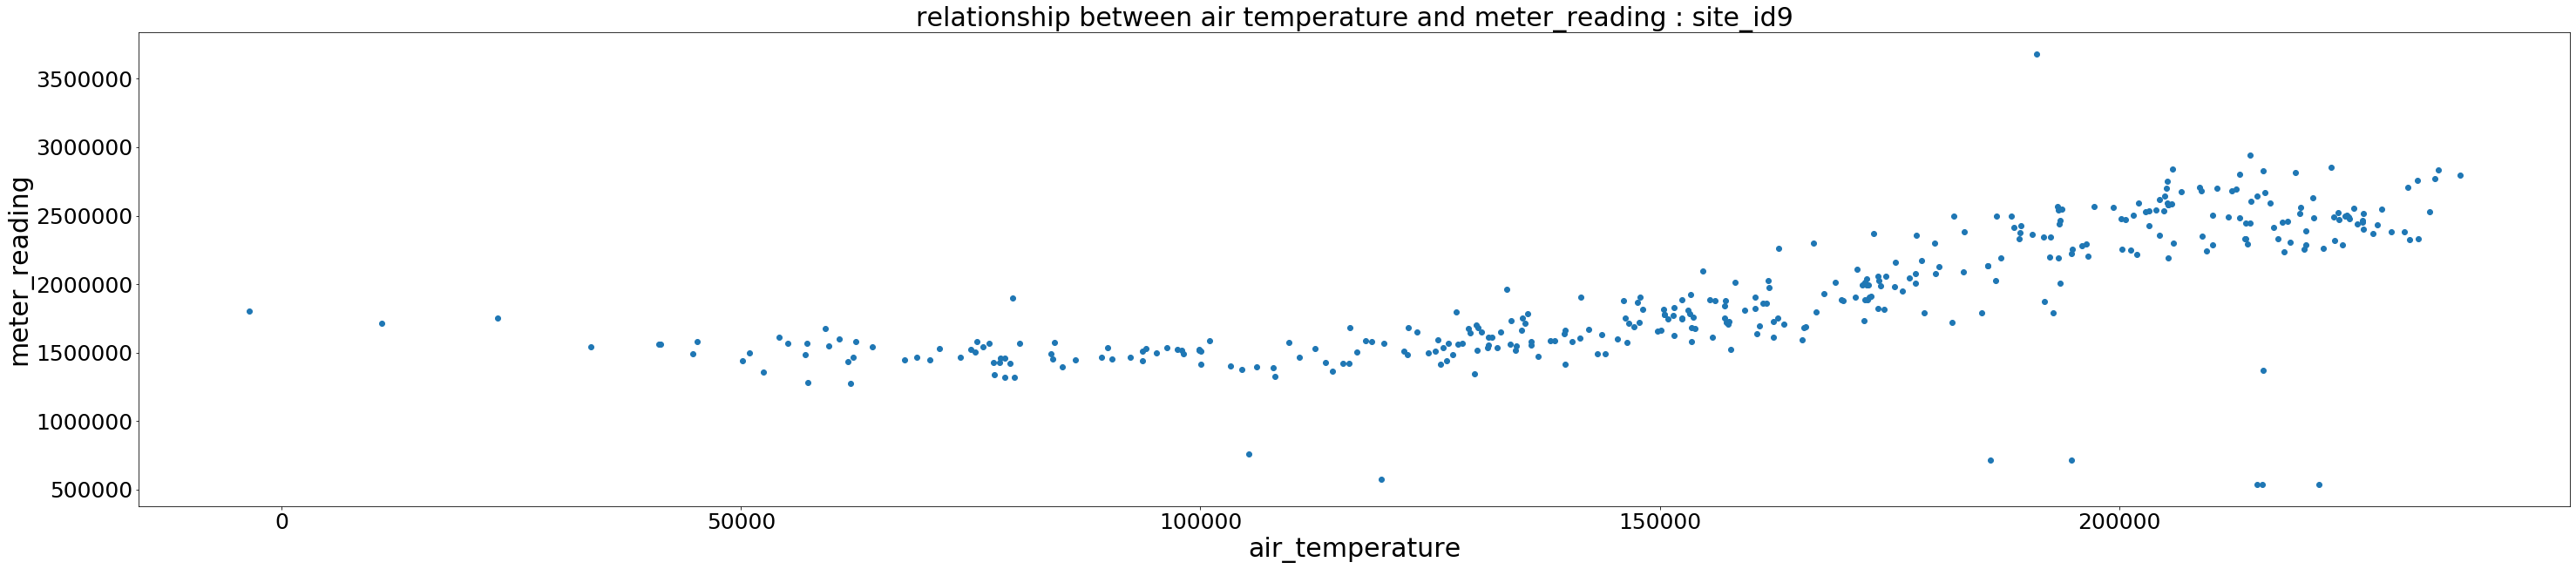

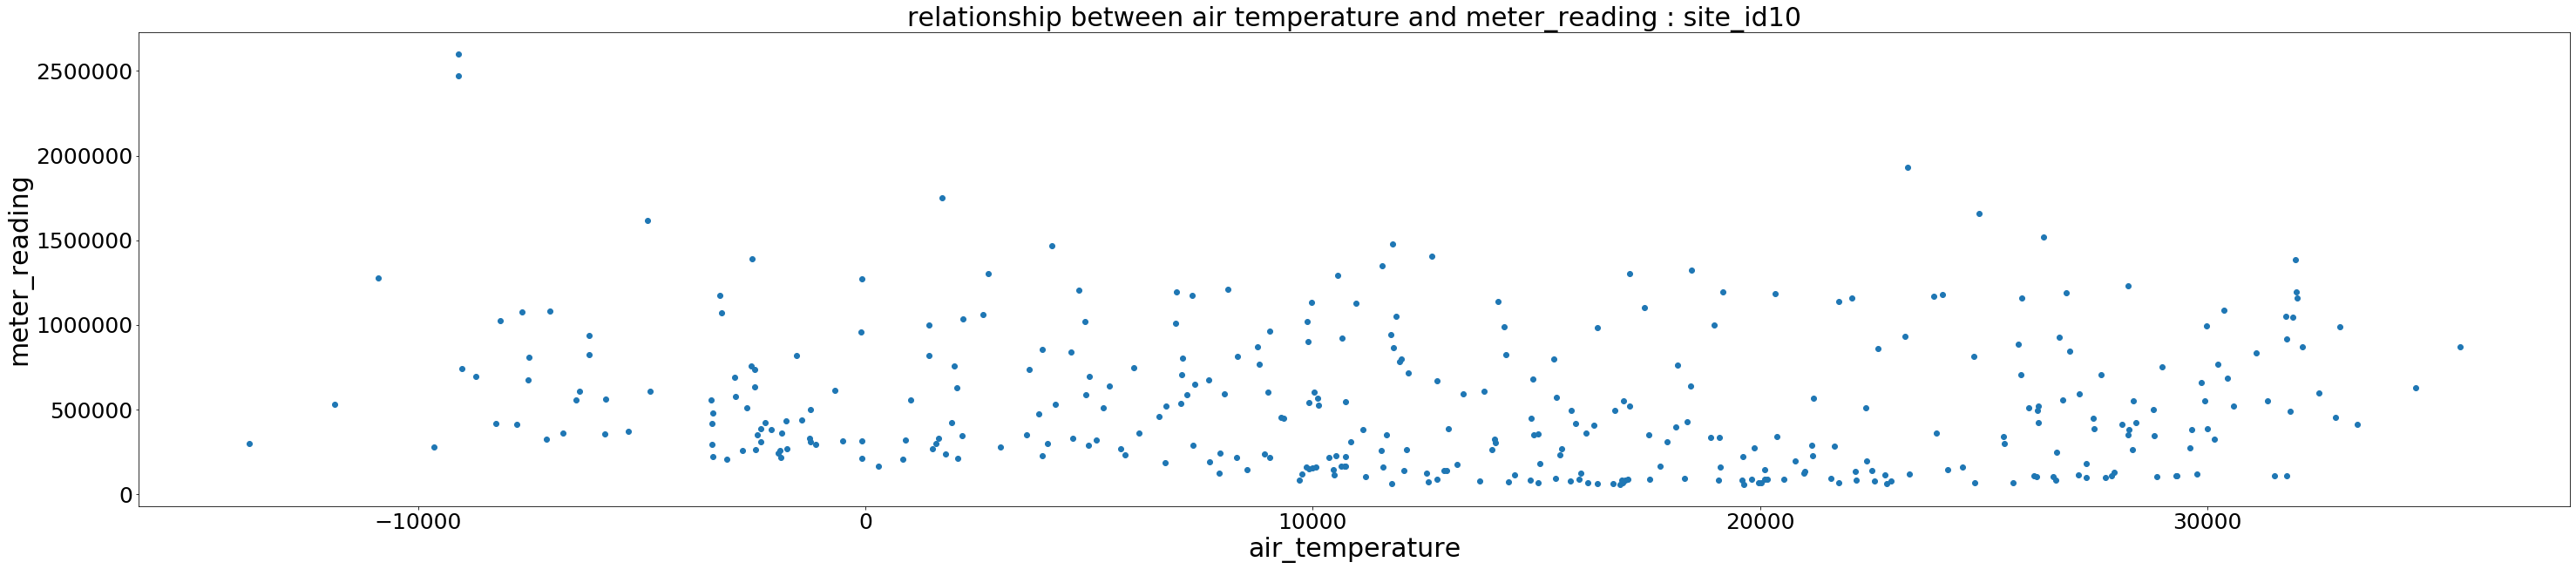

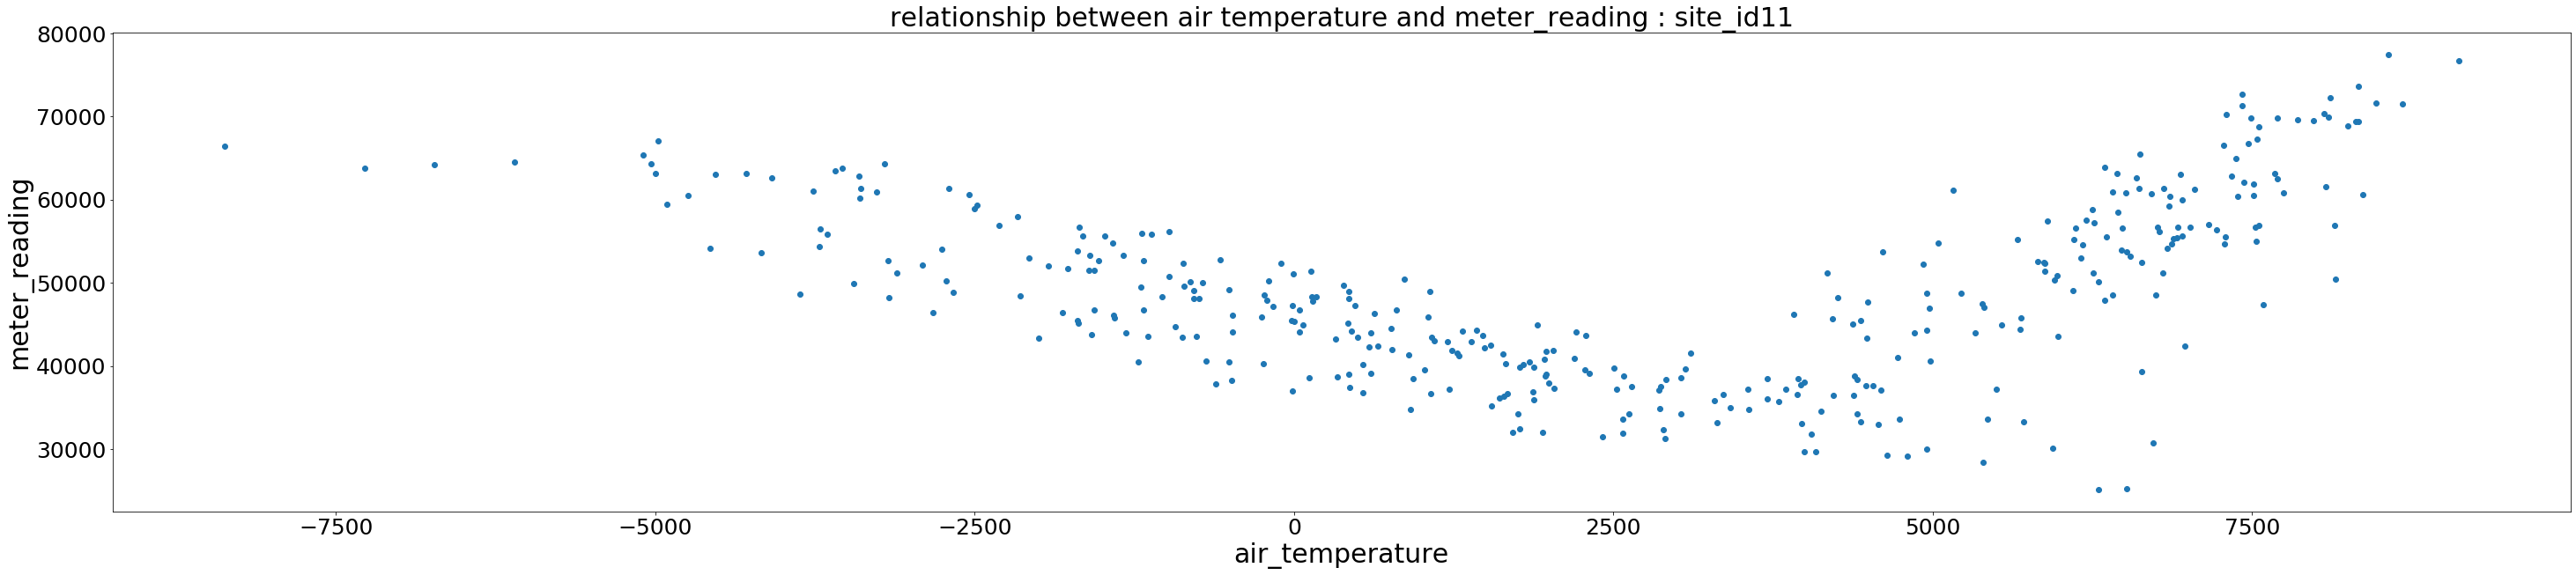

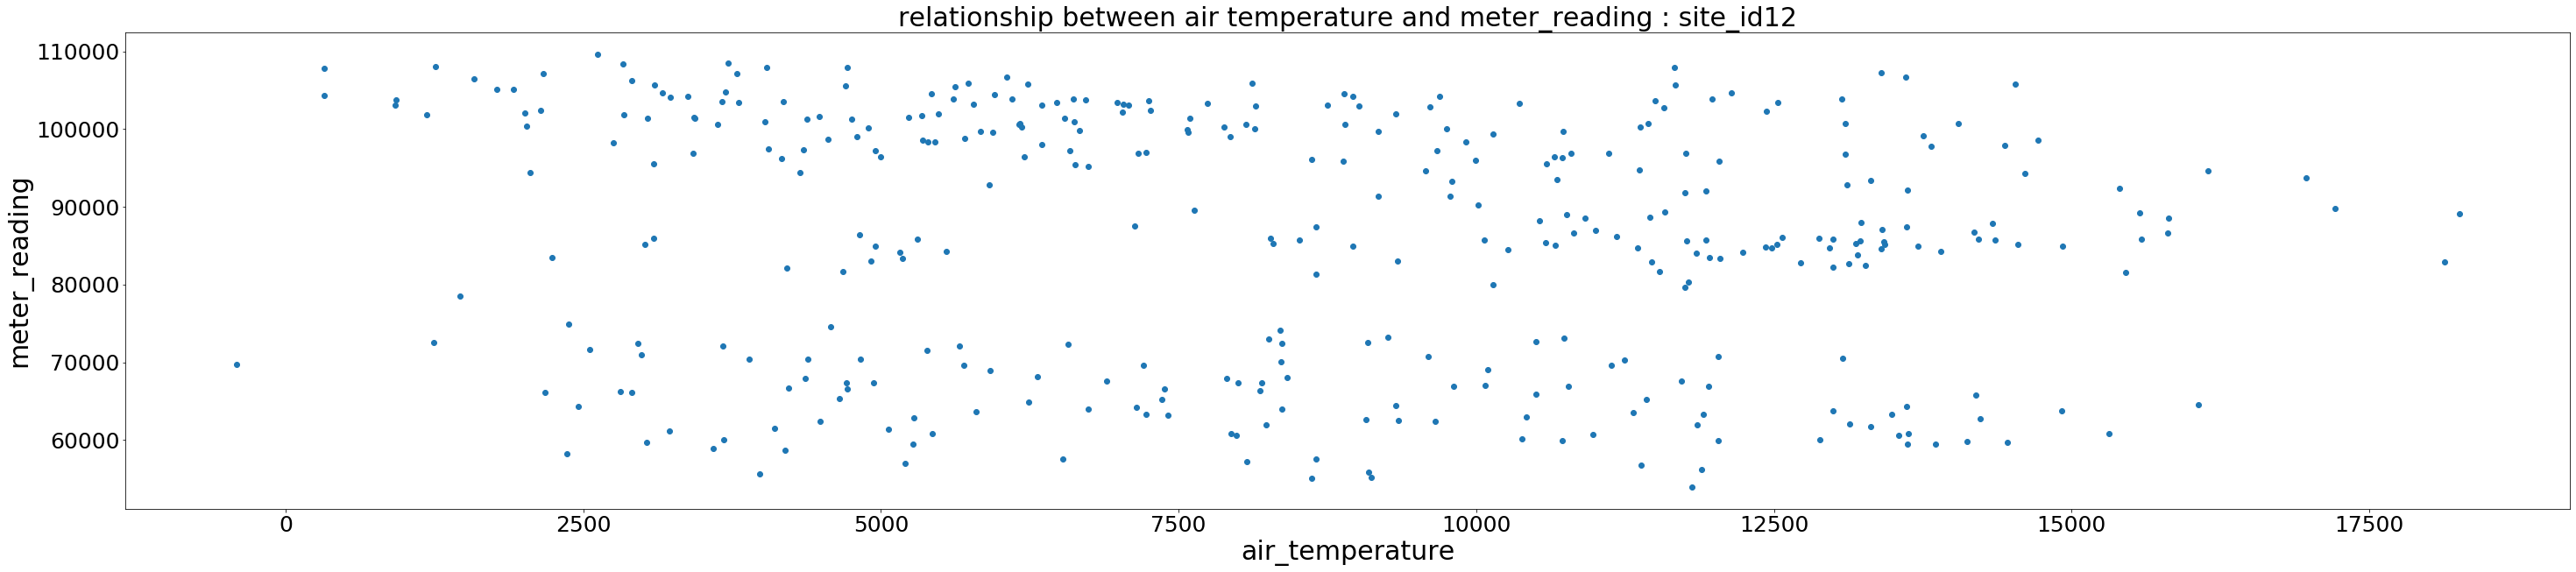

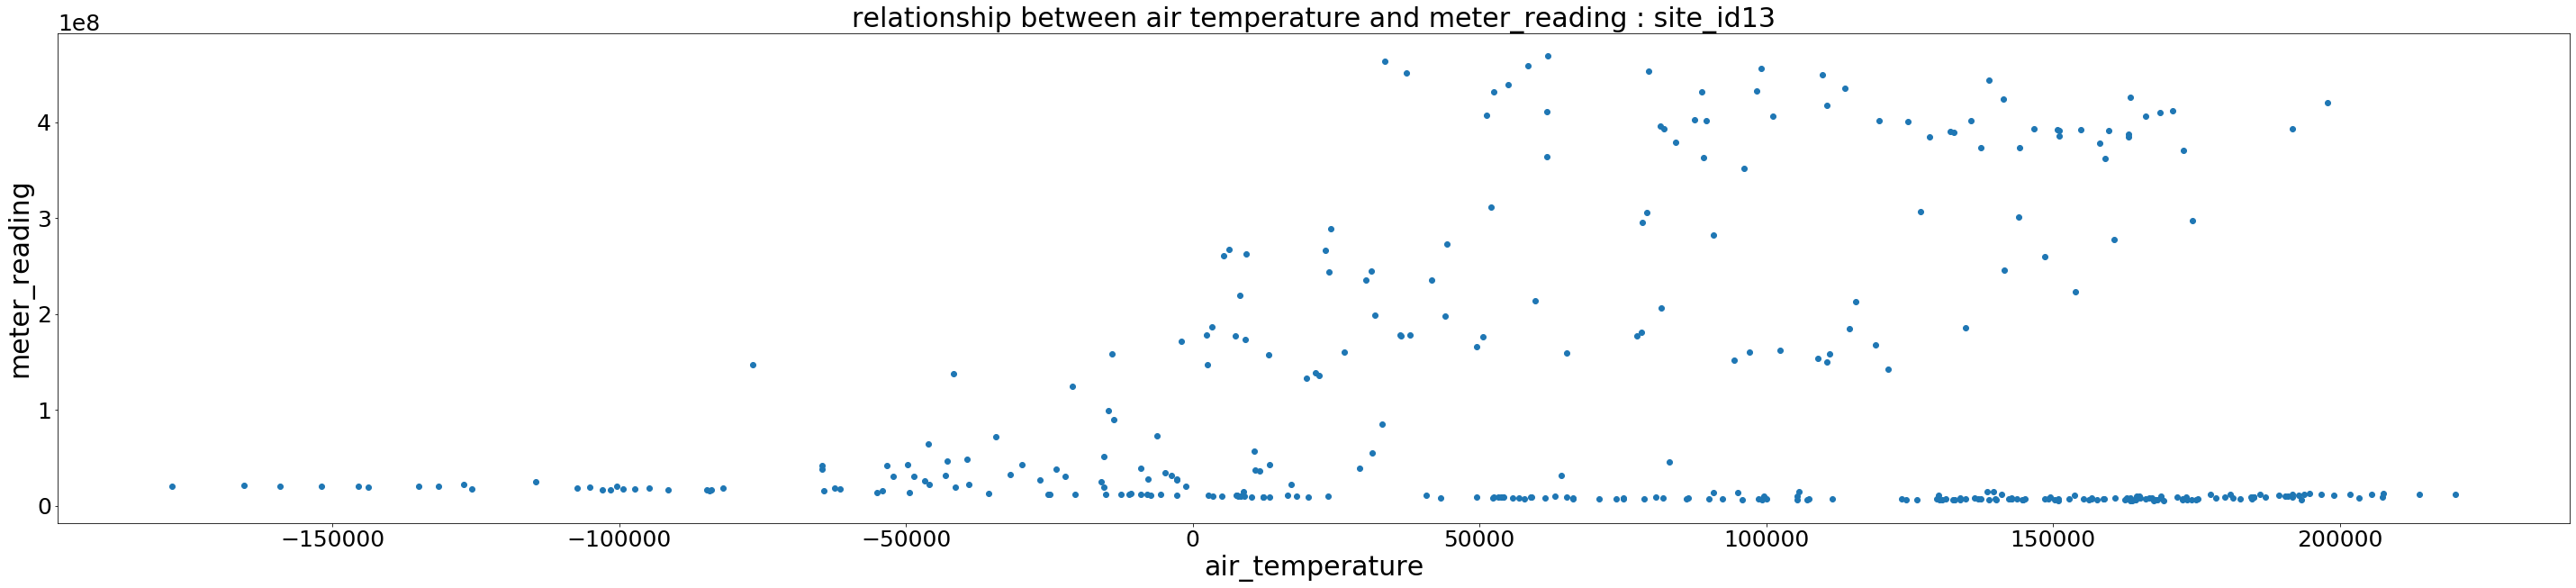

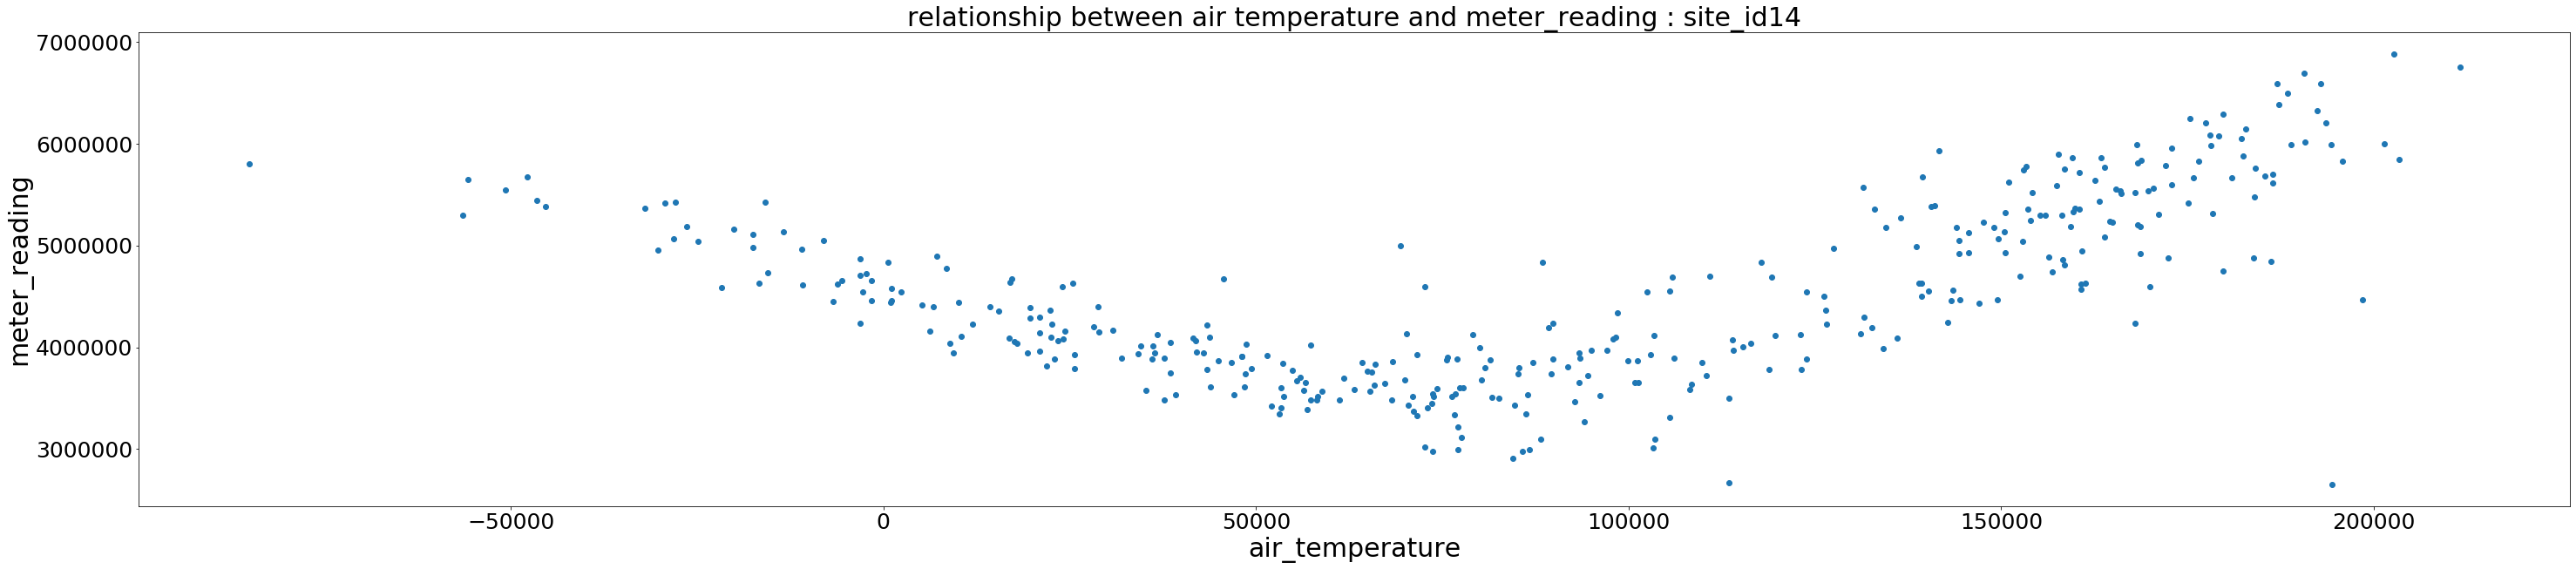

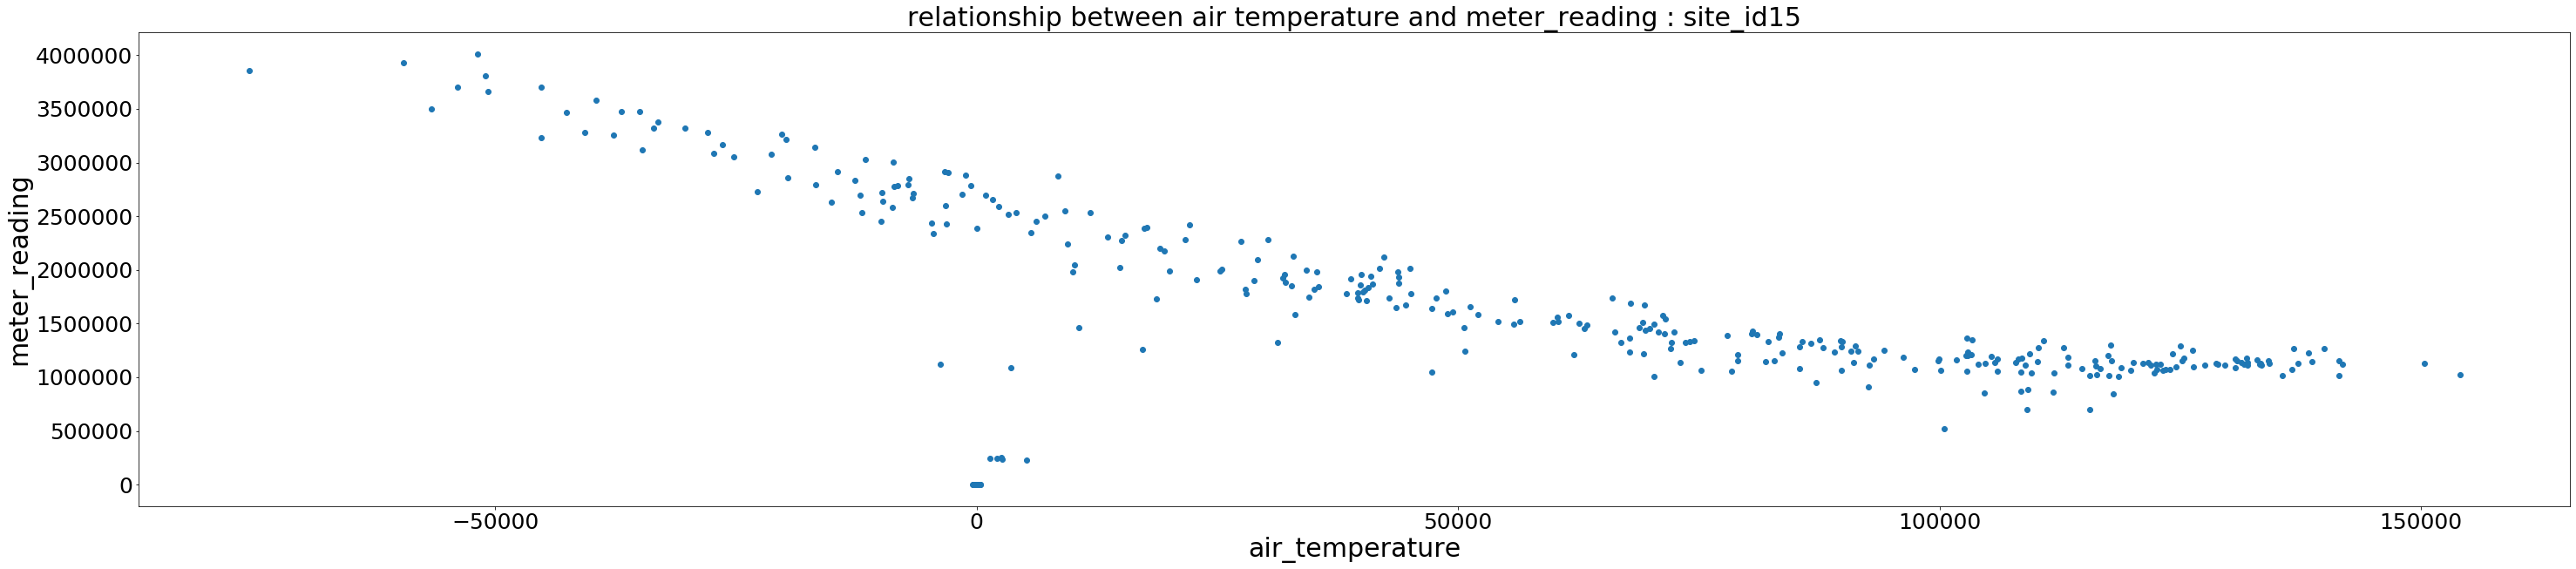

In [110]:
for j in range(16) :
    fig = plt.figure(figsize=(50,10))
    plt.rc('xtick',labelsize=25)
    plt.rc('ytick',labelsize=25)
    plt.scatter(merged_data[(merged_data['site_id'] == j)].resample("D").sum()['air_temperature'],merged_data[(merged_data['site_id'] == j)].resample("D").sum()['meter_reading'])
    plt.title('relationship between air temperature and meter_reading'+" : site_id"+str(j),fontsize=30)
    plt.xlabel('air_temperature', fontsize=30)
    plt.ylabel('meter_reading', fontsize=30)
    plt.savefig('meter_reading_and_temp_per_site_id'+str(j),dpi=300)
    plt.show()

Lodging/residential
Parking
Entertainment/public assembly
Education
Other
Retail
Office


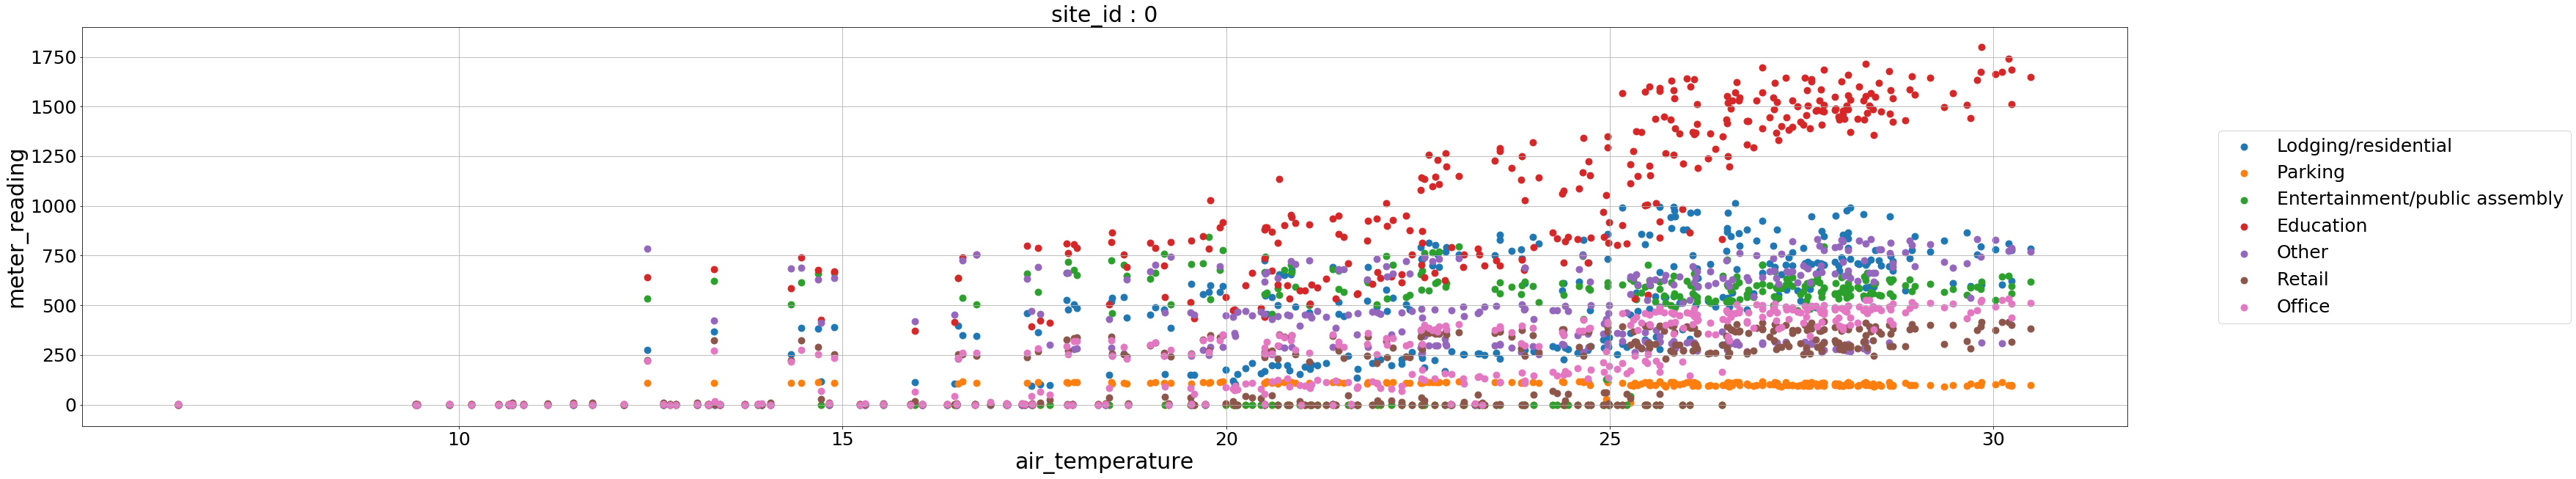

Lodging/residential
Public services
Entertainment/public assembly
Education
Office


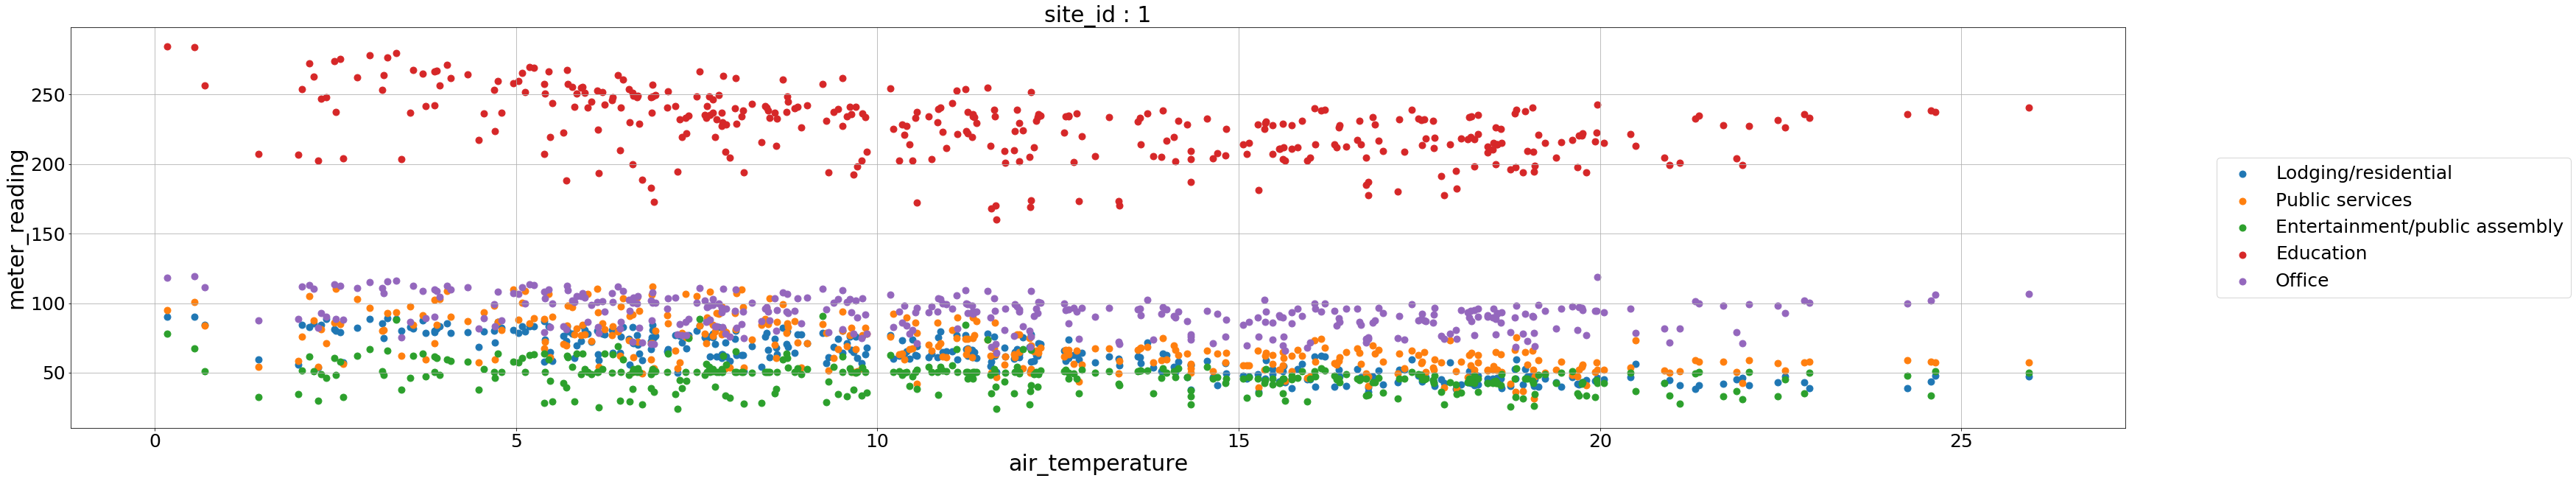

Lodging/residential
Public services
Religious worship
Utility
Parking
Entertainment/public assembly
Office
Education
Food sales and service
Healthcare
Retail
Warehouse/storage


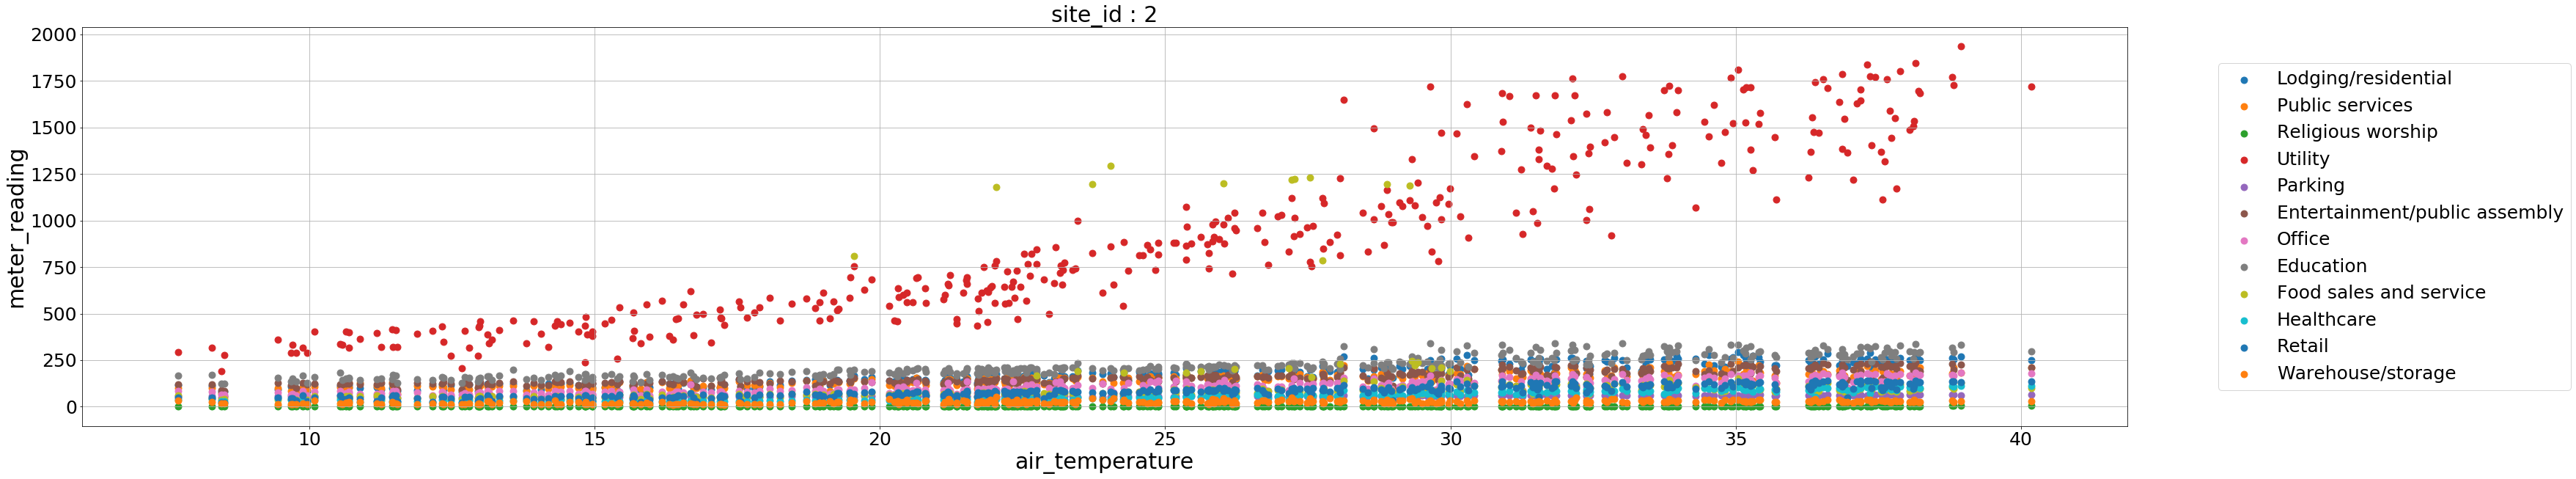

Lodging/residential
Public services
Warehouse/storage
Religious worship
Parking
Entertainment/public assembly
Education
Other
Healthcare
Retail
Office


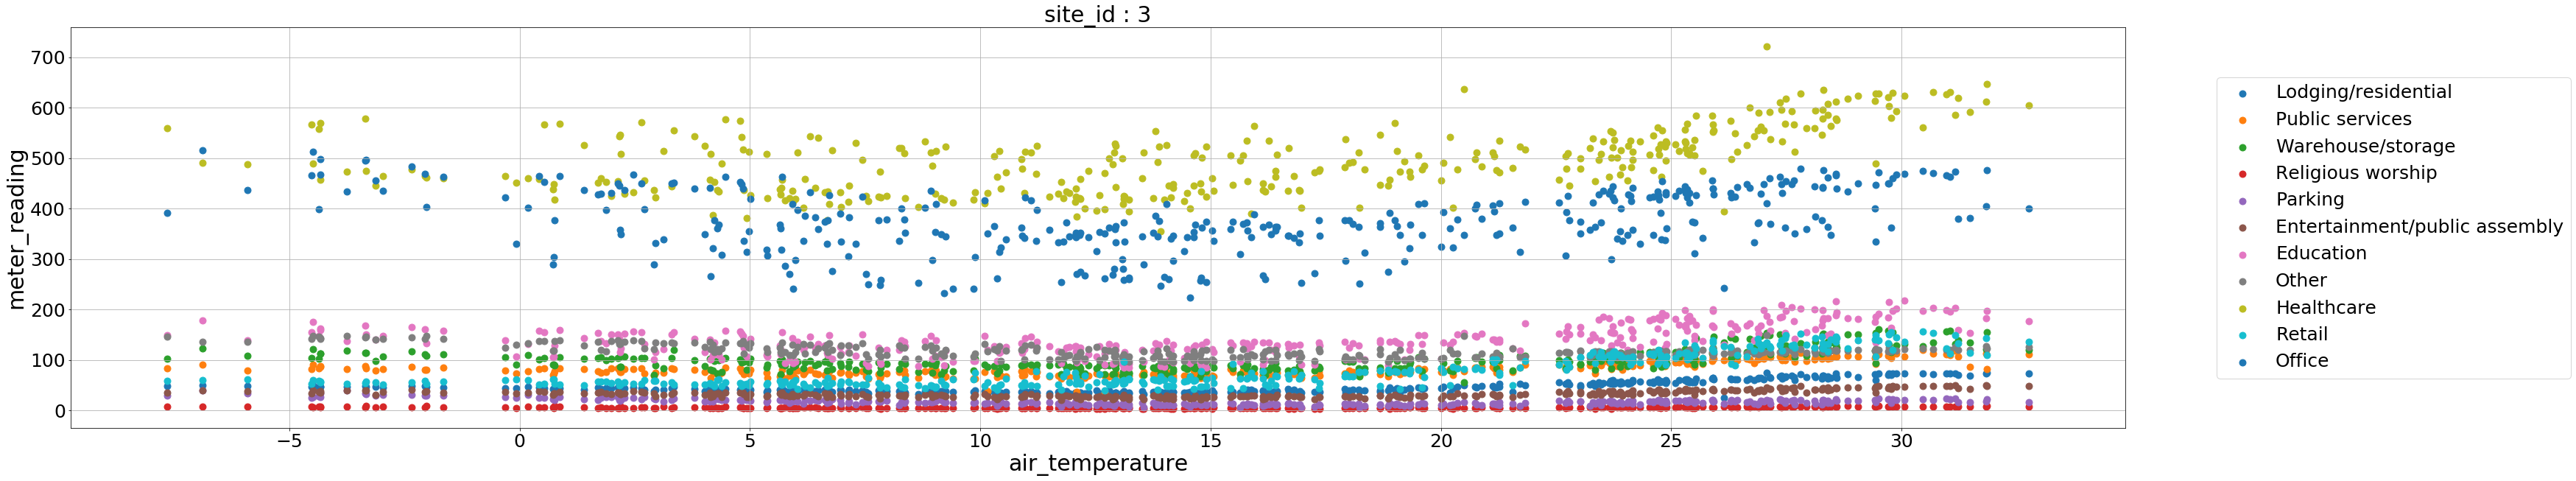

Lodging/residential
Public services
Parking
Entertainment/public assembly
Education
Utility
Technology/science


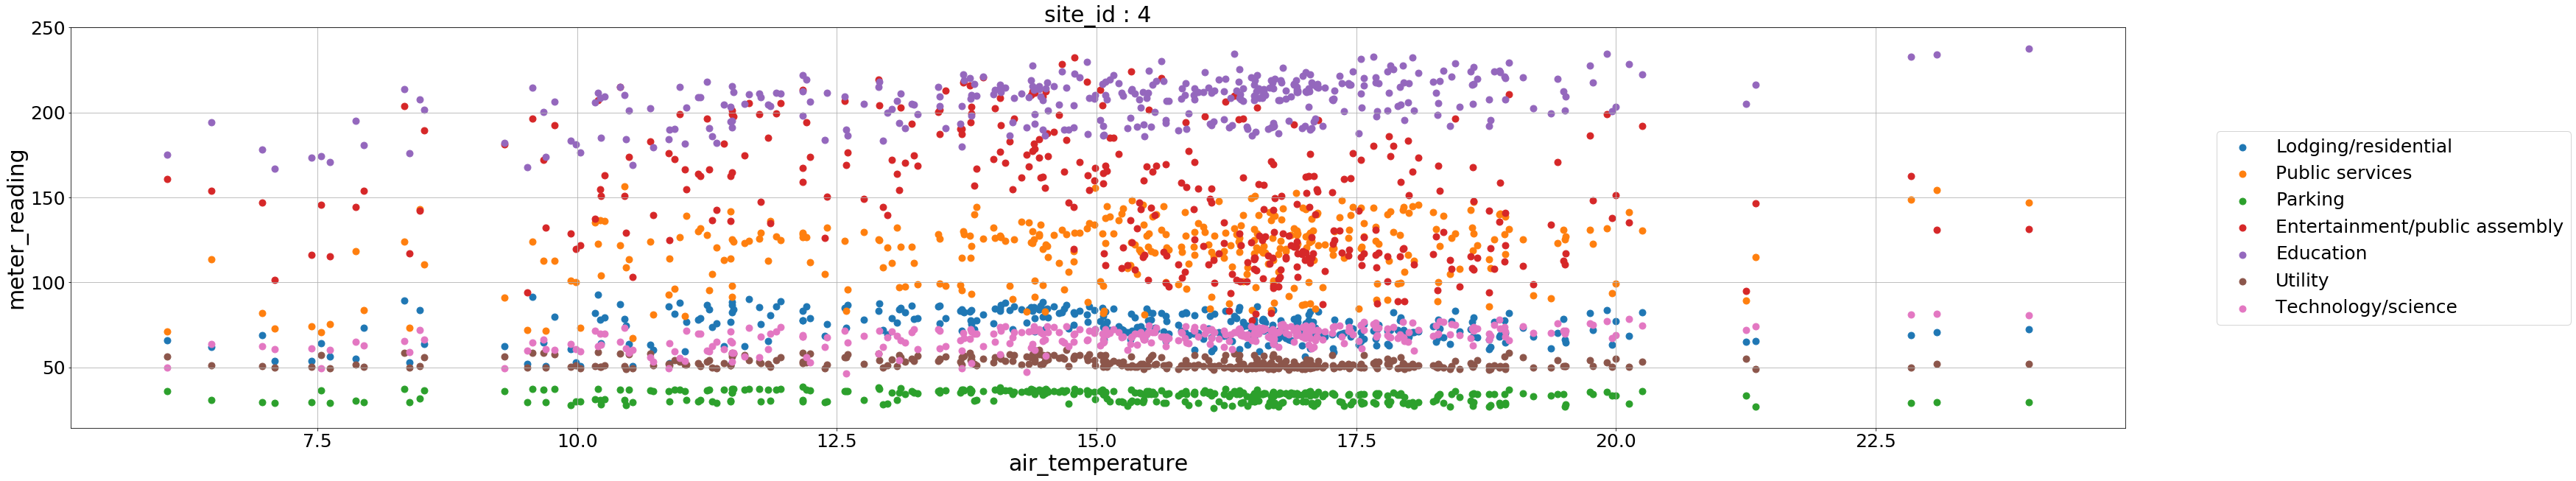

Lodging/residential
Public services
Entertainment/public assembly
Manufacturing/industrial
Education
Other
Healthcare
Office


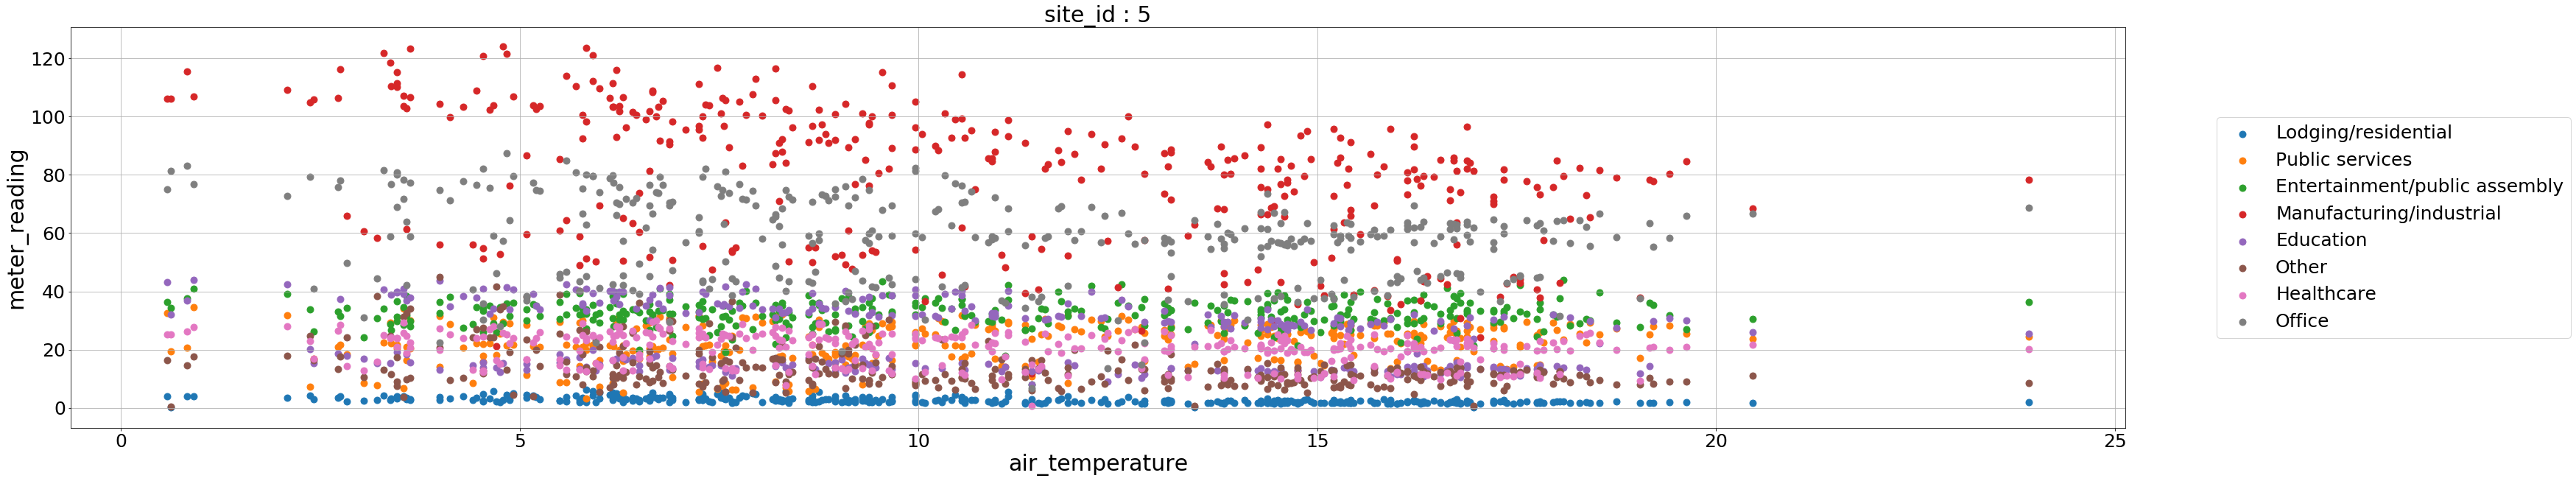

Lodging/residential
Public services
Entertainment/public assembly
Education
Office


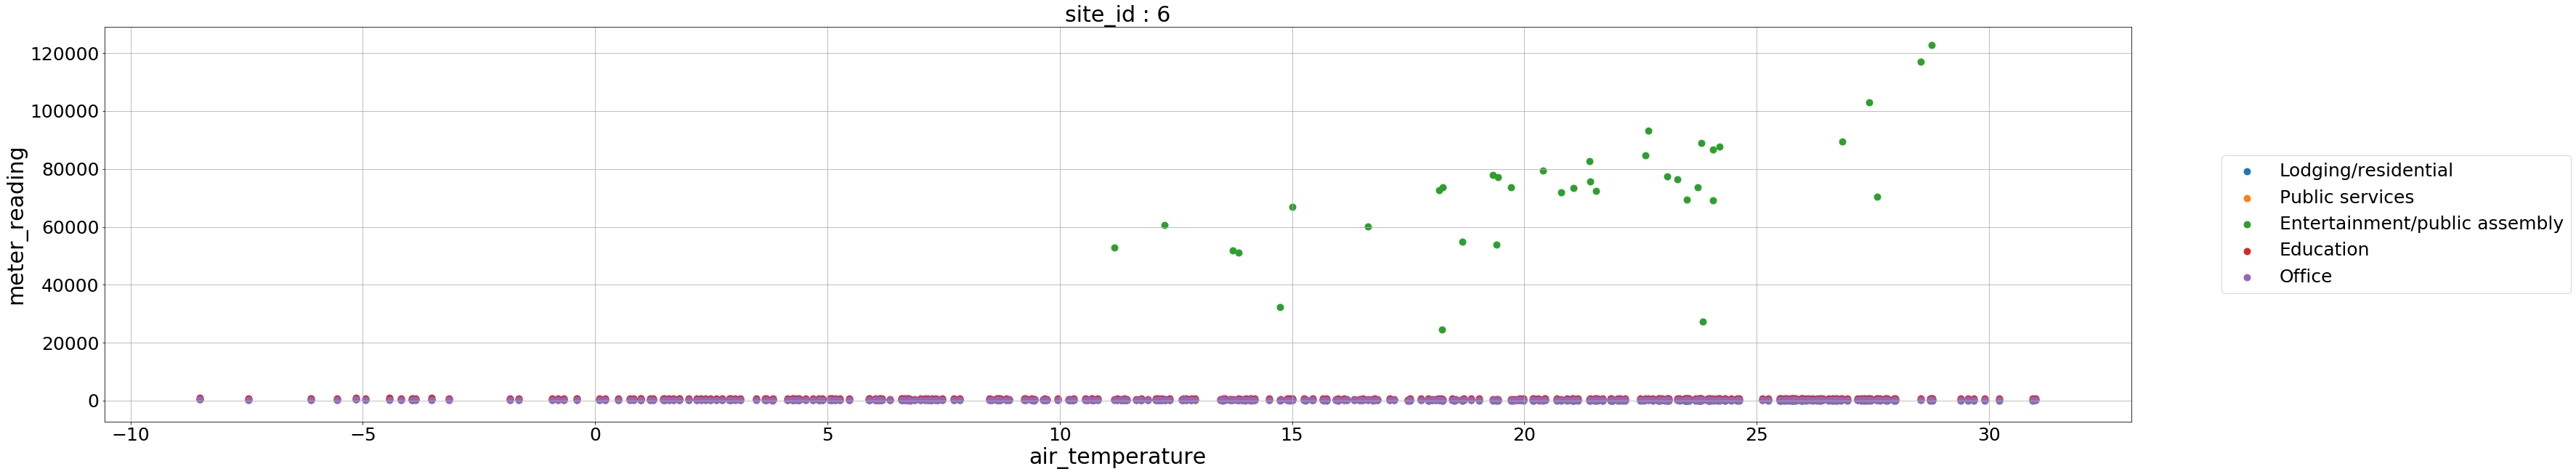

Education


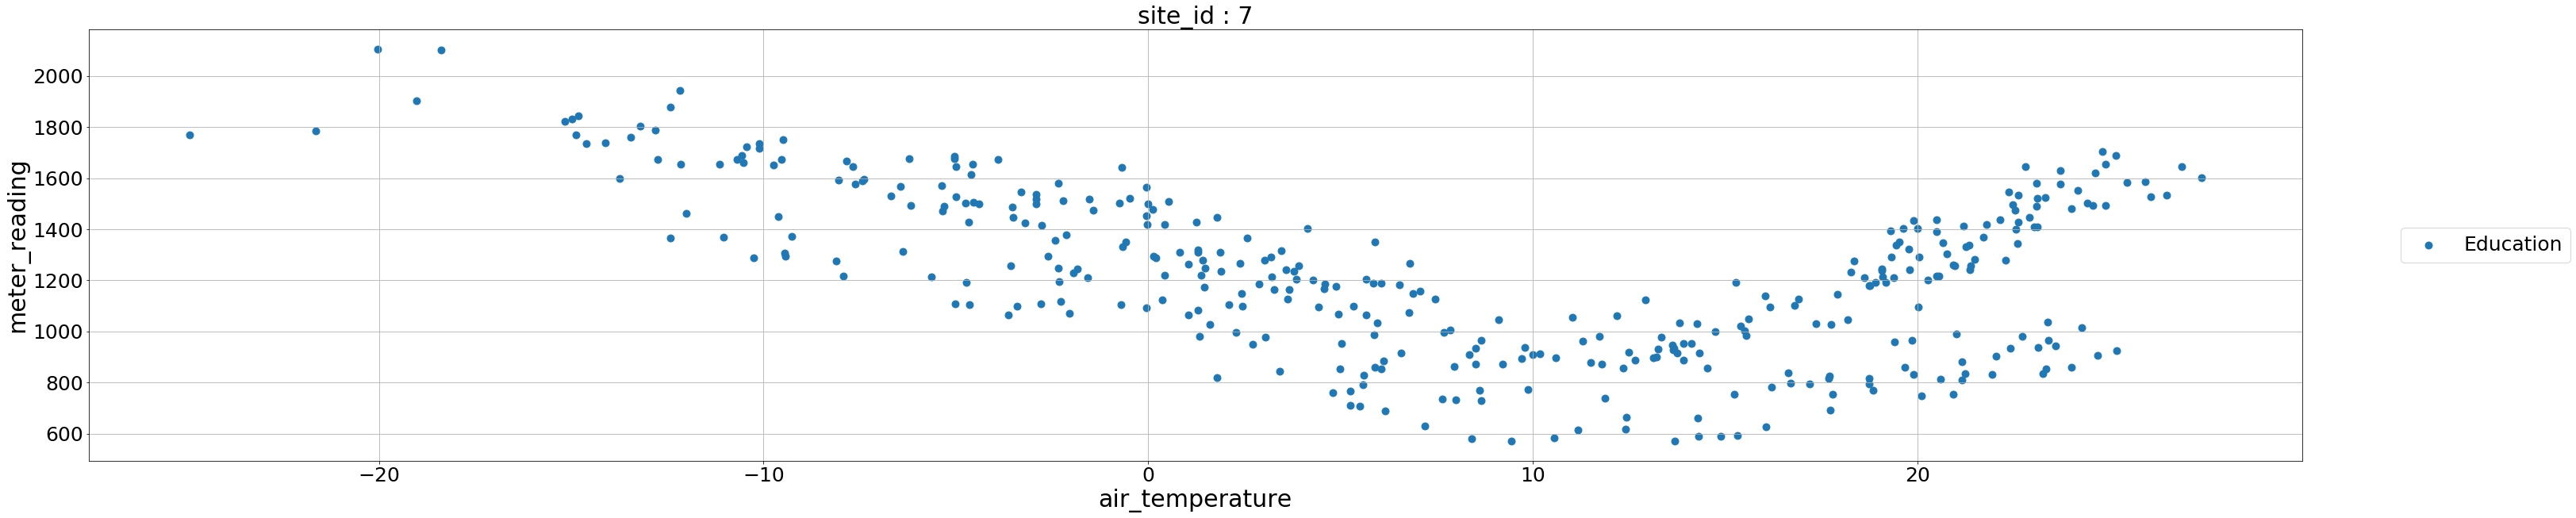

Public services
Entertainment/public assembly
Office
Other
Warehouse/storage


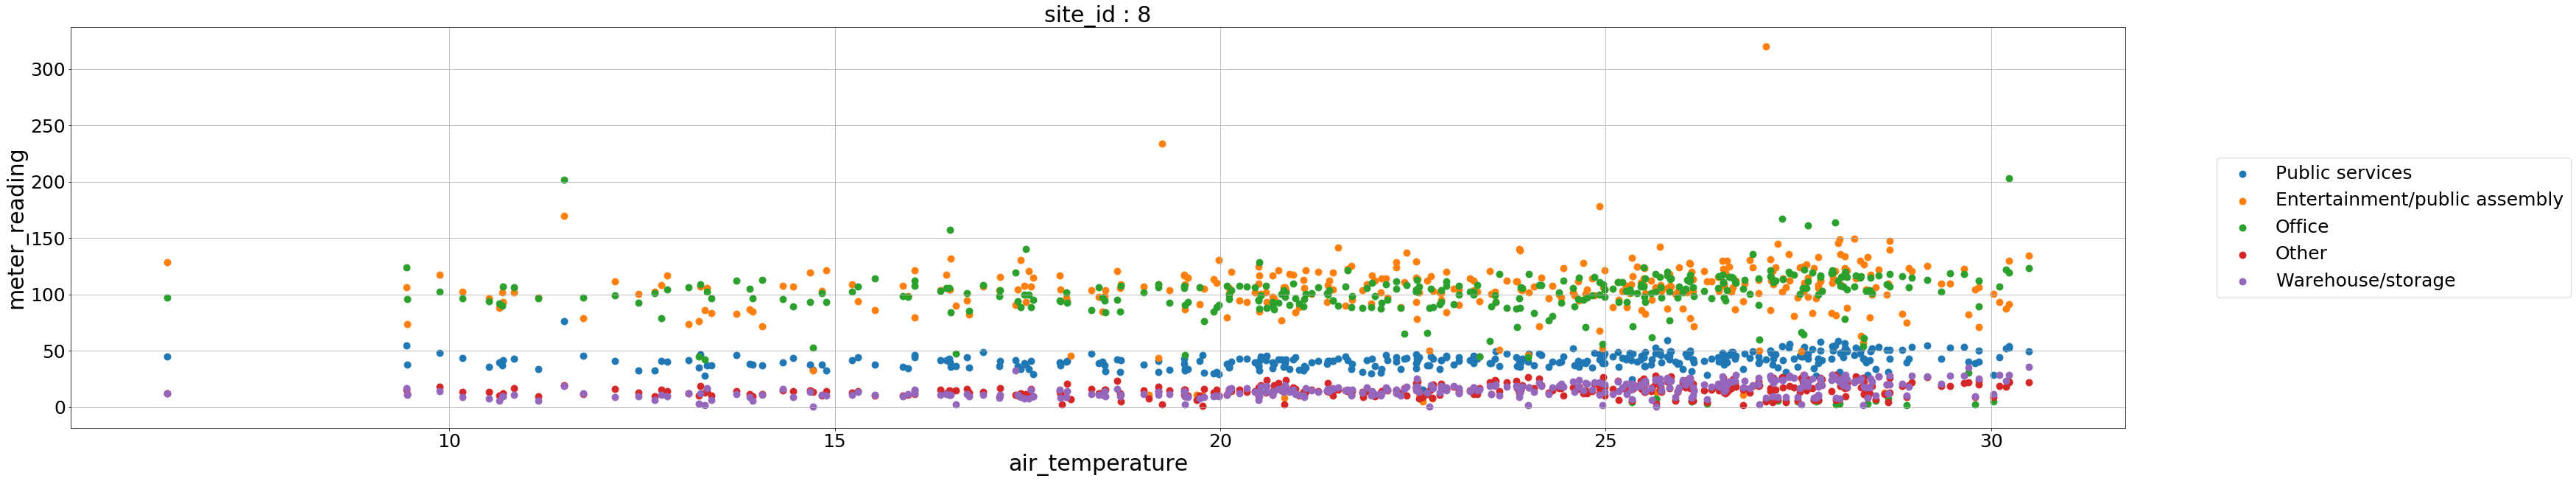

Lodging/residential
Public services
Entertainment/public assembly
Education
Office
Services


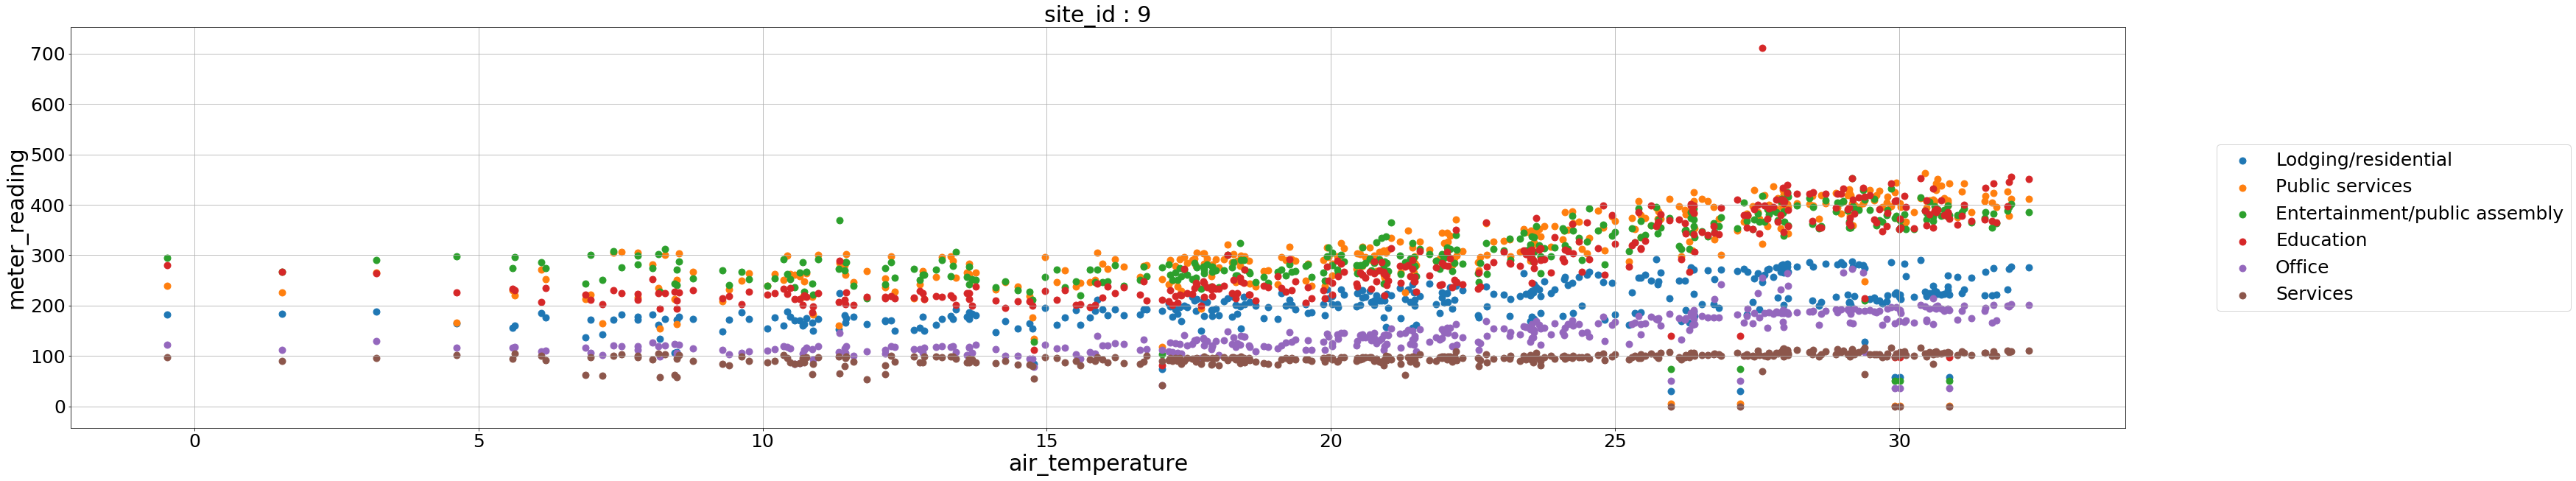

Lodging/residential
Entertainment/public assembly
Education
Other
Technology/science
Office


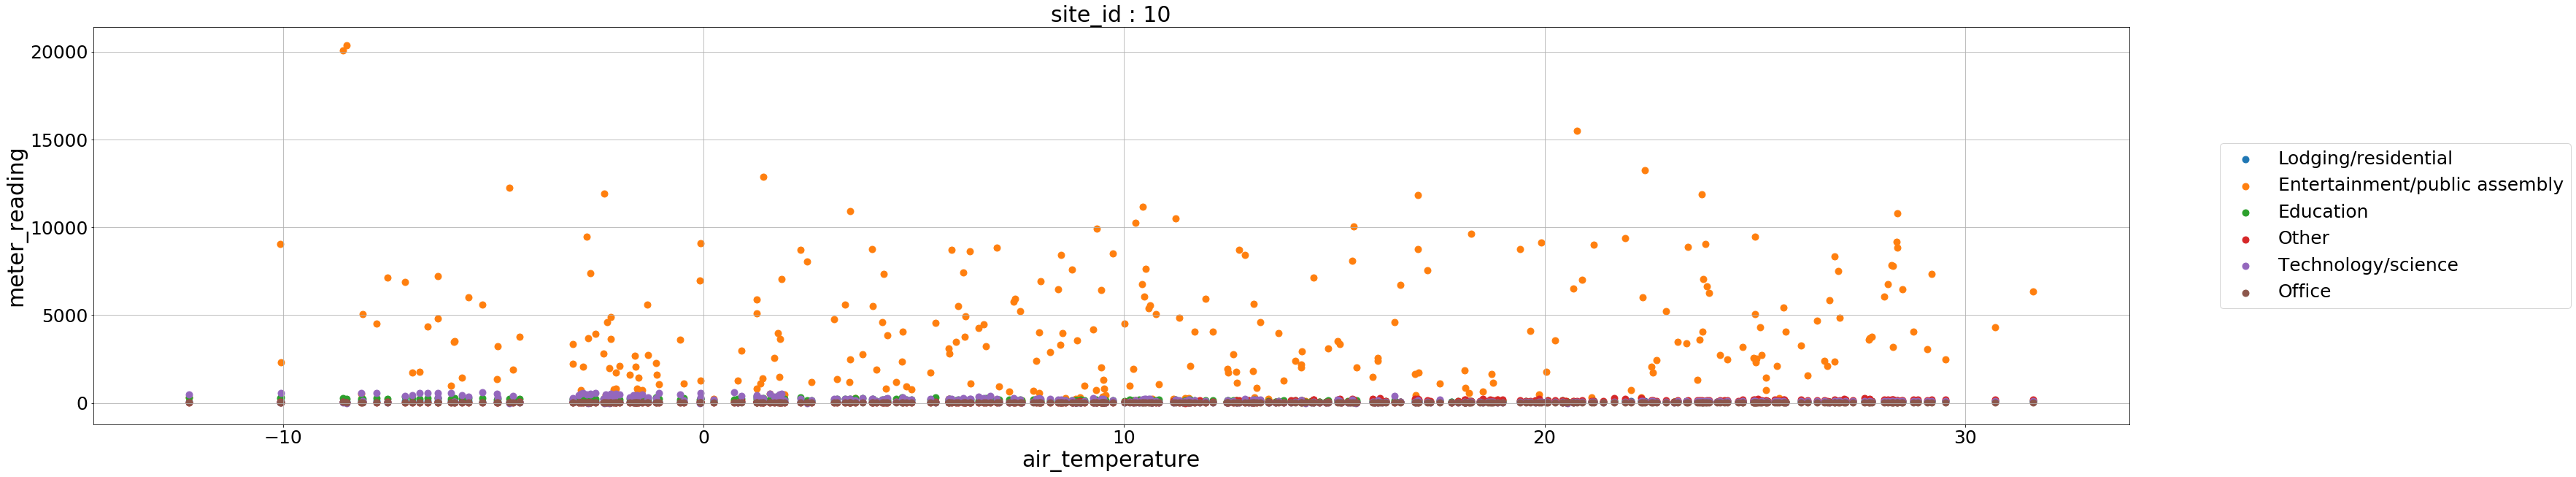

Education


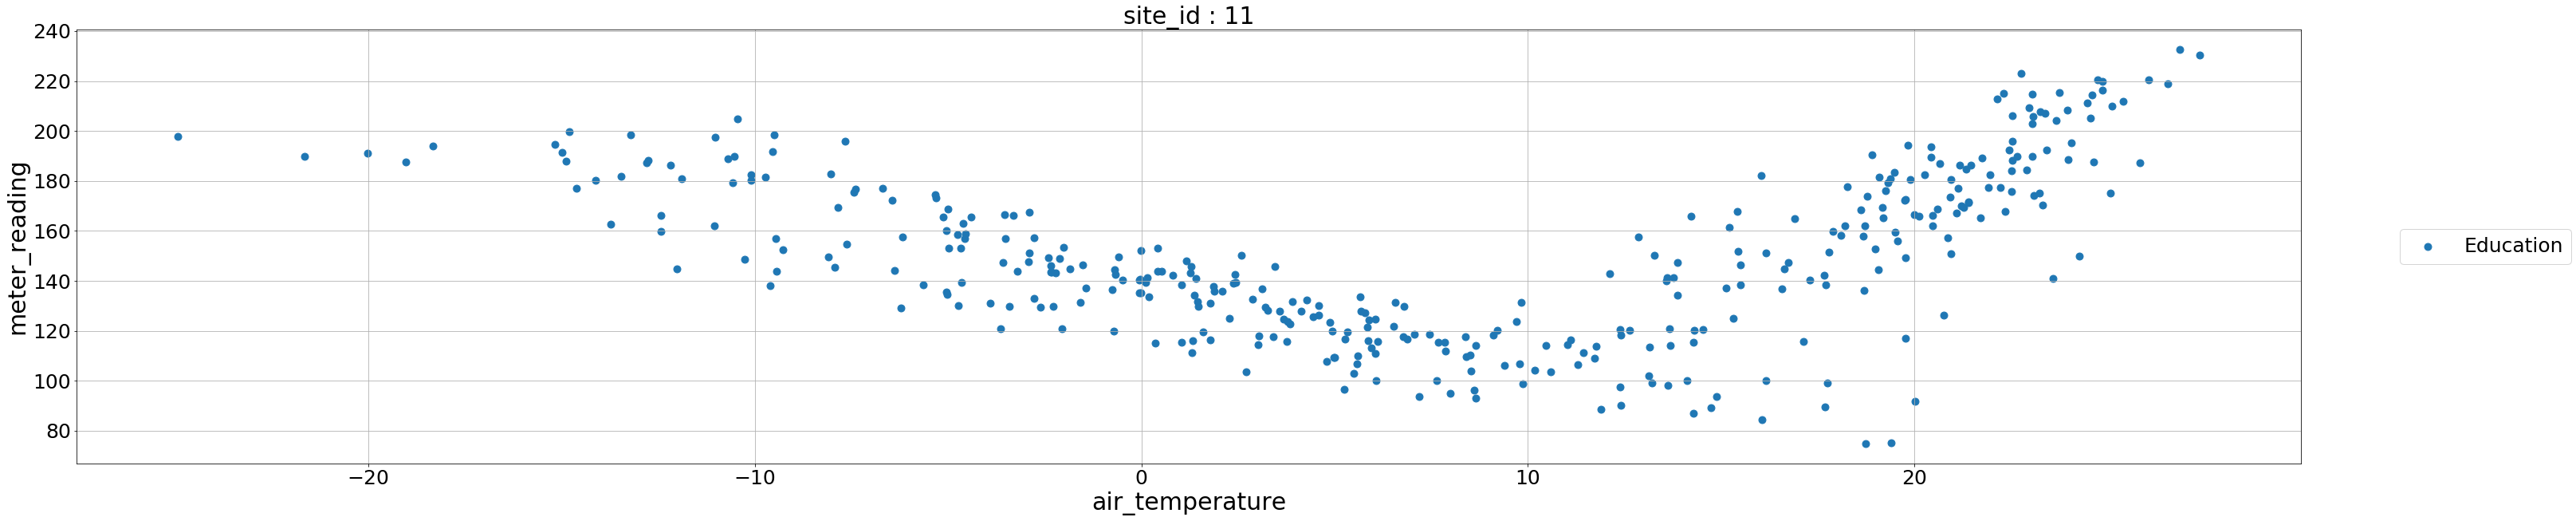

Public services
Entertainment/public assembly
Technology/science
Education
Retail
Office


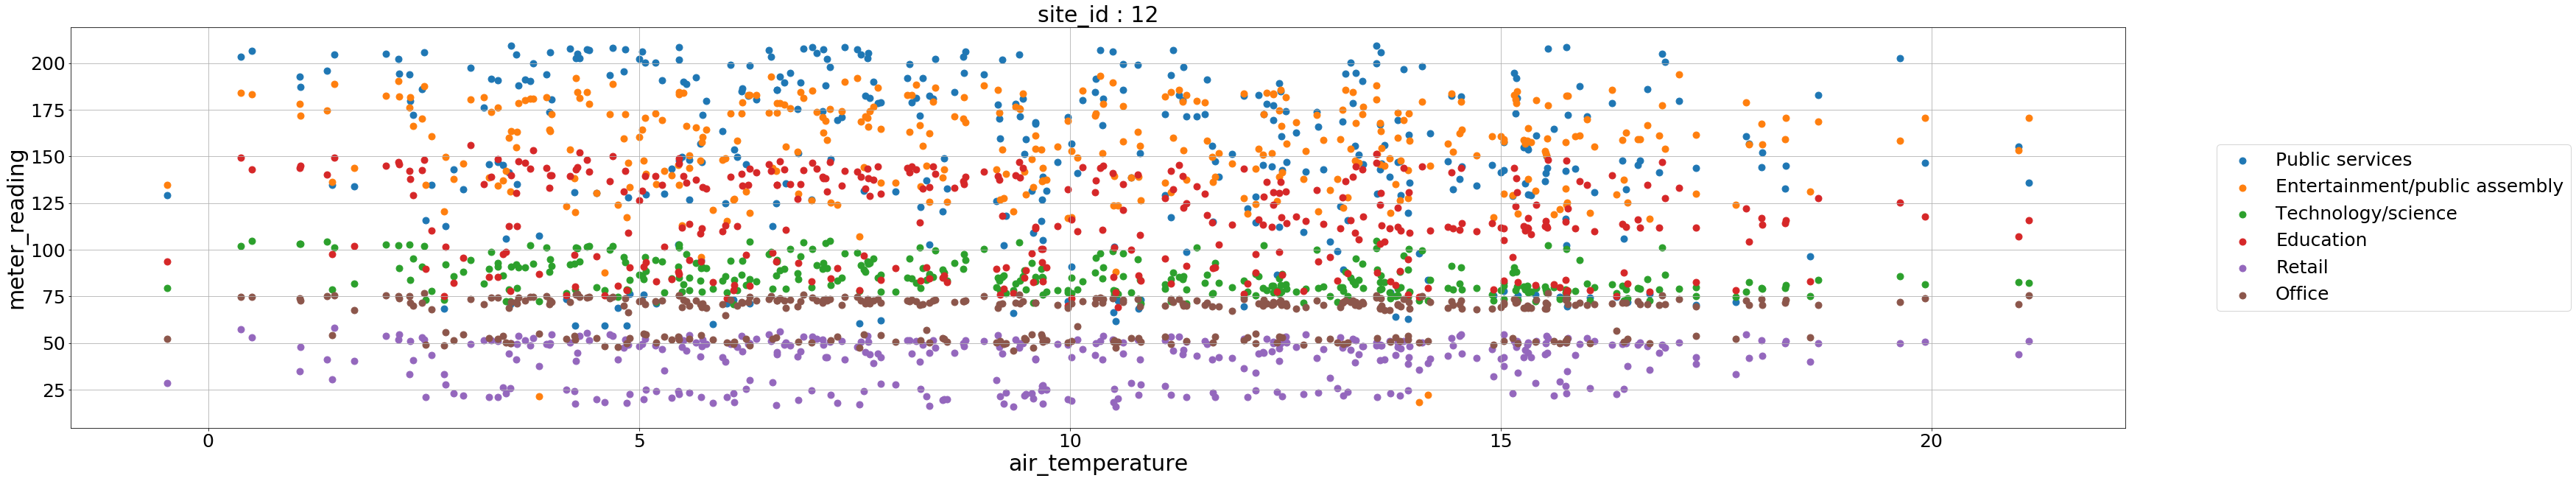

Lodging/residential
Public services
Warehouse/storage
Parking
Entertainment/public assembly
Manufacturing/industrial
Education
Other
Healthcare
Food sales and service
Technology/science
Office
Services


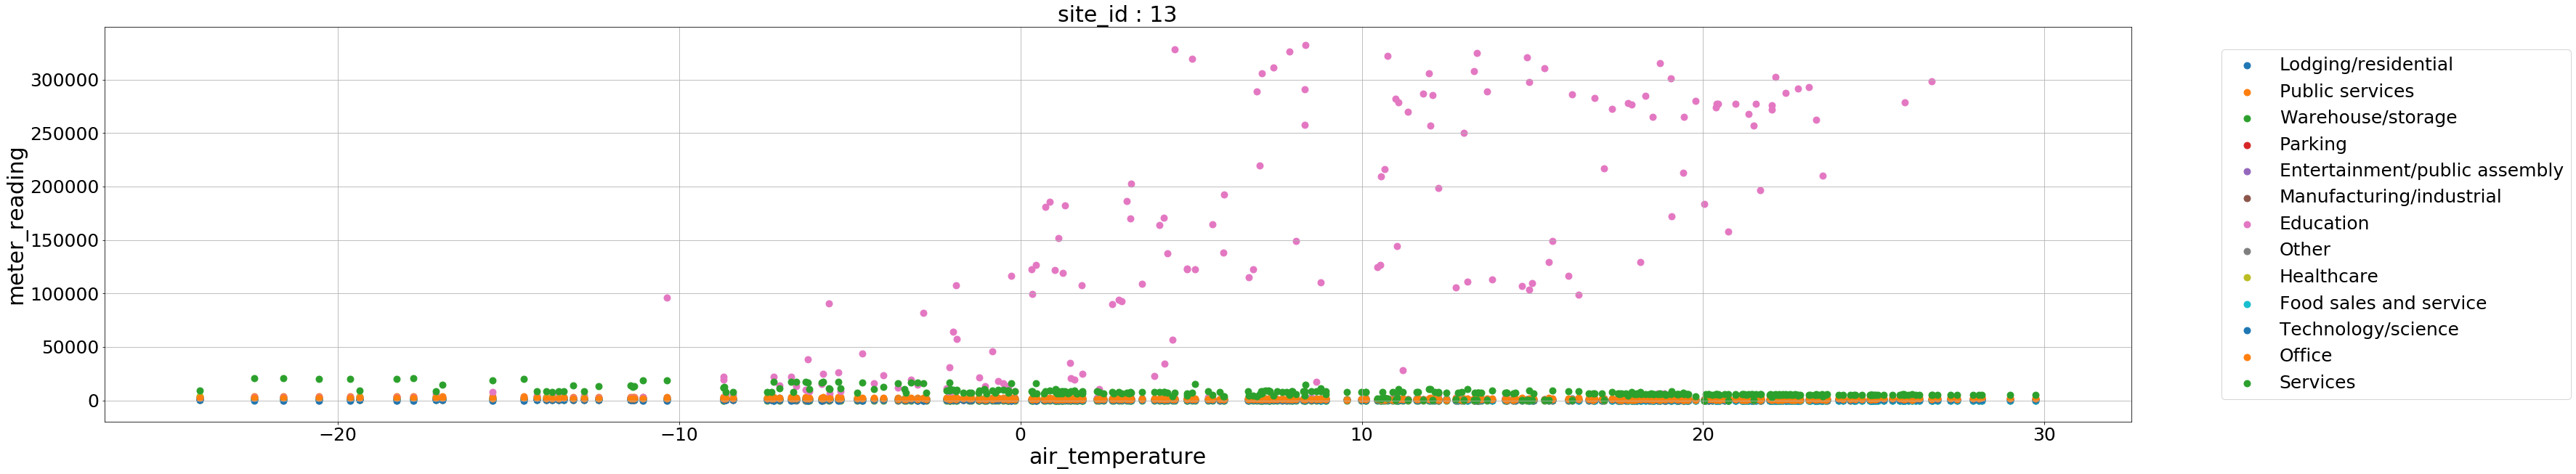

Lodging/residential
Public services
Entertainment/public assembly
Education
Food sales and service
Healthcare
Office


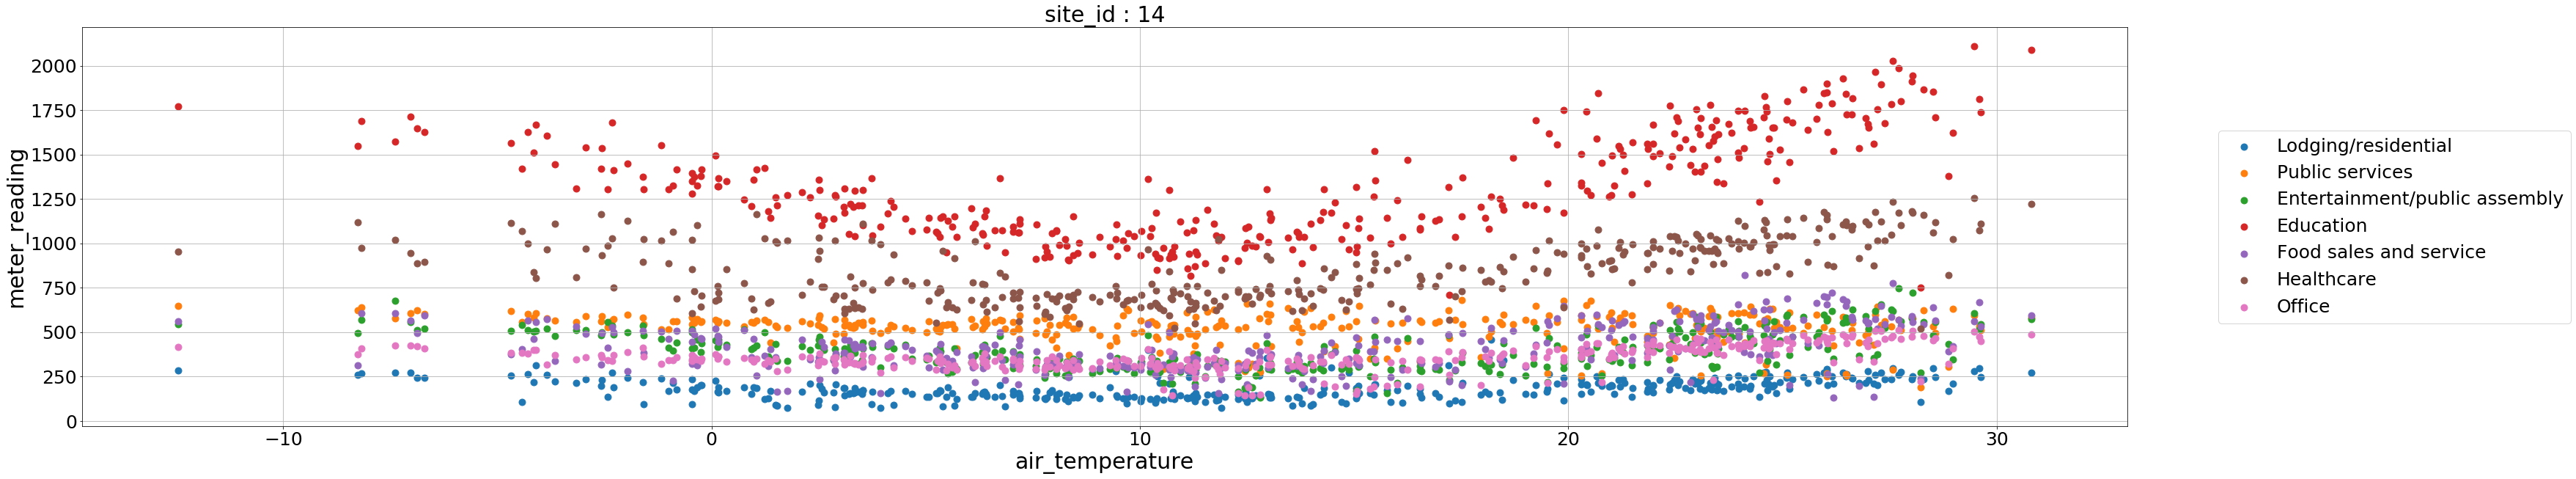

Lodging/residential
Public services
Religious worship
Entertainment/public assembly
Manufacturing/industrial
Education
Healthcare
Utility
Technology/science
Office


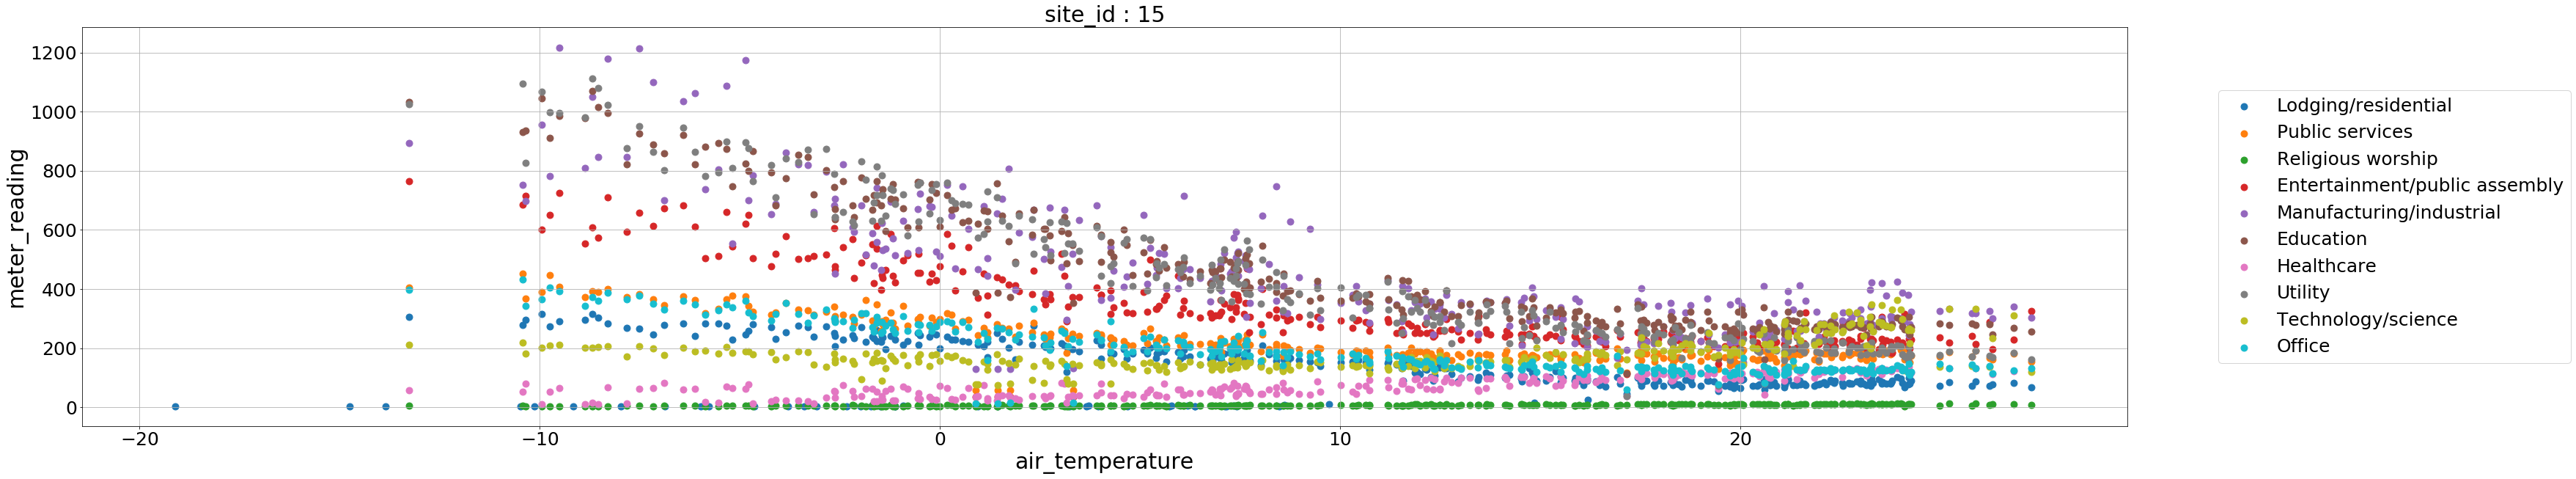

In [77]:
for j in range(16):
    fig = plt.figure(figsize=(50,10))
    plt.grid(True)
    for i in set(mer_data[mer_data['site_id']==j]['primary_use']):        
        plt.rc('xtick',labelsize=25)
        plt.rc('ytick',labelsize=25)
        plt.title('site_id : ' + str(j), fontsize=30)
        plt.scatter(merged_data[(merged_data['site_id'] == j)].resample("D").mean()['air_temperature'],merged_data[(merged_data['site_id']==j)&(merged_data['primary_use']==i)].resample("D").mean()['meter_reading'], s=80)
        plt.xlabel("air_temperature", fontsize=30)
        plt.ylabel("meter_reading", fontsize=30)
        print(i)
    
    plt.legend(set(merged_data[merged_data['site_id']==j]['primary_use']),
          bbox_to_anchor=(1.04,0.5),loc = "center left",fontsize=25)     
    plt.savefig('meter_temp_different_sectors_site_id:'+str(j),bbox_inches="tight")
    plt.show()
    

